In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# df1=pd.read_csv("booking_delhi_hotels_full_895.csv")
# df1.shape

In [3]:
# df2 = pd.read_csv("booking_delhi_NCR_hotels_full_523.csv")
# df2.shape

In [4]:
# df = pd.concat([df1, df2], ignore_index=True)

# print(df.shape)

In [5]:

# df.to_csv("Hotel_Booking_Dataset.csv", index=False)

# print("Saved:", df.shape)


In [6]:
df = pd.read_csv("Hotel_Booking_Dataset.csv")

In [7]:
df.head()

,hotel_name,location,price,original_price,ratings,score,reviews,rooms,beds,breakfast,transportation,metro_access,cancellation_policy,center_distance,tax_charges
0,Calabash Luxury Villa Hotel Delhi Airport - Fr...,"Aerocity, New Delhi (Aerocity)","12,597","31,494",Exceptional,10.0,3,Double Room,1 double bed,Breakfast included,Airport shuttle (free),Metro access,Free cancellation,13.6 km from centre,630
1,HOTEL UPTOWN with Luxury Restaurant & Rooftop ...,"Paharganj, New Delhi (Chandni Chowk)","31,950","71,000",Very good,8.2,878,Family Suite With Window - Perfect For 3-4 Adults,"2 beds (1 single, 1 extra-large double)",NaN,NaN,Metro access,Free cancellation,1.4 km from centre,"1,598"
2,Holiday Inn New Delhi Aerocity by IHG,"Aerocity, New Delhi (Aerocity)","107,131","107,131",Fabulous,8.9,"7,271",One King Bed Standard - Non Smoking Pool view,1 extra-large double bed,NaN,Swimming pool,Metro access,No prepayment needed – pay at the property,13.5 km from centre,"22,498"
3,Hotel Pearl Plaza - In City Centre Connaught P...,"Paharganj, New Delhi (Chandni Chowk)","19,081","23,852",Fabulous,8.6,384,Superior Triple Room,"2 beds (1 single, 1 large double)",NaN,Free parking,Metro access,Free cancellation,1.4 km from centre,954
4,The Tivoli New Delhi,"Chattarpur, New Delhi","70,000","140,000",Good,7.9,73,Deluxe Double Room,1 double bed,NaN,Swimming pool,No Metro,NaN,15.8 km from centre,"12,600"


#### Data Cleanning

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isna().sum()

hotel_name                0
location                  0
price                     2
original_price            2
ratings                 181
score                     0
reviews                   0
rooms                     2
beds                      3
breakfast              1230
transportation          670
metro_access              0
cancellation_policy     289
center_distance         518
tax_charges               0
dtype: int64

In [10]:
df.describe()

,score
count,1418.000000
mean,5.901622
std,3.037183
min,0.000000
25%,4.500000
50%,7.000000
75%,8.100000
max,10.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hotel_name           1418 non-null   object 
 1   location             1418 non-null   object 
 2   price                1416 non-null   object 
 3   original_price       1416 non-null   object 
 4   ratings              1237 non-null   object 
 5   score                1418 non-null   float64
 6   reviews              1418 non-null   object 
 7   rooms                1416 non-null   object 
 8   beds                 1415 non-null   object 
 9   breakfast            188 non-null    object 
 10  transportation       748 non-null    object 
 11  metro_access         1418 non-null   object 
 12  cancellation_policy  1129 non-null   object 
 13  center_distance      900 non-null    object 
 14  tax_charges          1418 non-null   object 
dtypes: float64(1), object(14)
memory usage

In [12]:
df.columns

Index(['hotel_name', 'location', 'price', 'original_price', 'ratings', 'score',
       'reviews', 'rooms', 'beds', 'breakfast', 'transportation',
       'metro_access', 'cancellation_policy', 'center_distance',
       'tax_charges'],
      dtype='object')

In [13]:
price_cols = ['price', 'original_price', 'tax_charges']

for col in price_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(',', '')
        .str.extract(r'(\d+\.?\d*)')   # keep only numbers
        .astype(float)
    )

df['tax_charges'].fillna(0, inplace=True)
df.dropna(subset=['price', 'original_price'], inplace=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_23580\3128361784.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tax_charges'].fillna(0, inplace=True)


In [14]:
df['reviews'] = (
    df['reviews']
    .astype(str)
    .str.replace(',', '')
    .str.extract(r'(\d+)')
    .astype(float)
)

df['reviews'].fillna(df['reviews'].median(), inplace=True)

df['reviews'] = df['reviews'].astype(int)


C:\Users\Asus\AppData\Local\Temp\ipykernel_23580\3281394895.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews'].fillna(df['reviews'].median(), inplace=True)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1416 entries, 0 to 1417
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hotel_name           1416 non-null   object 
 1   location             1416 non-null   object 
 2   price                1416 non-null   float64
 3   original_price       1416 non-null   float64
 4   ratings              1235 non-null   object 
 5   score                1416 non-null   float64
 6   reviews              1416 non-null   int64  
 7   rooms                1416 non-null   object 
 8   beds                 1415 non-null   object 
 9   breakfast            188 non-null    object 
 10  transportation       748 non-null    object 
 11  metro_access         1416 non-null   object 
 12  cancellation_policy  1129 non-null   object 
 13  center_distance      899 non-null    object 
 14  tax_charges          1416 non-null   float64
dtypes: float64(4), int64(1), object(10)
memory 

In [16]:
df.describe().round()

,price,original_price,score,reviews,tax_charges
count,1416.0,1416.0,1416.0,1416.0,1416.0
mean,37998.0,49214.0,6.0,211.0,4757.0
std,206049.0,207095.0,3.0,566.0,37261.0
min,3945.0,4675.0,0.0,0.0,0.0
25%,10750.0,15403.0,4.0,4.0,634.0
50%,17832.0,26892.0,7.0,27.0,945.0
75%,31950.0,47496.0,8.0,132.0,1627.0
max,5382000.0,5382000.0,10.0,7644.0,968760.0


In [17]:
df.head(5)

,hotel_name,location,price,original_price,ratings,score,reviews,rooms,beds,breakfast,transportation,metro_access,cancellation_policy,center_distance,tax_charges
0,Calabash Luxury Villa Hotel Delhi Airport - Fr...,"Aerocity, New Delhi (Aerocity)",12597.0,31494.0,Exceptional,10.0,3,Double Room,1 double bed,Breakfast included,Airport shuttle (free),Metro access,Free cancellation,13.6 km from centre,630.0
1,HOTEL UPTOWN with Luxury Restaurant & Rooftop ...,"Paharganj, New Delhi (Chandni Chowk)",31950.0,71000.0,Very good,8.2,878,Family Suite With Window - Perfect For 3-4 Adults,"2 beds (1 single, 1 extra-large double)",NaN,NaN,Metro access,Free cancellation,1.4 km from centre,1598.0
2,Holiday Inn New Delhi Aerocity by IHG,"Aerocity, New Delhi (Aerocity)",107131.0,107131.0,Fabulous,8.9,7271,One King Bed Standard - Non Smoking Pool view,1 extra-large double bed,NaN,Swimming pool,Metro access,No prepayment needed – pay at the property,13.5 km from centre,22498.0
3,Hotel Pearl Plaza - In City Centre Connaught P...,"Paharganj, New Delhi (Chandni Chowk)",19081.0,23852.0,Fabulous,8.6,384,Superior Triple Room,"2 beds (1 single, 1 large double)",NaN,Free parking,Metro access,Free cancellation,1.4 km from centre,954.0
4,The Tivoli New Delhi,"Chattarpur, New Delhi",70000.0,140000.0,Good,7.9,73,Deluxe Double Room,1 double bed,NaN,Swimming pool,No Metro,NaN,15.8 km from centre,12600.0


In [18]:
df['center_distance'].value_counts()

center_distance
1.3 km from centre     46
14.8 km from centre    34
1.4 km from centre     31
1 km from centre       28
13.8 km from centre    26
                       ..
16.3 km from centre     1
4.6 km from centre      1
6.1 km from centre      1
3.2 km from centre      1
26.7 km from centre     1
Name: count, Length: 175, dtype: int64

In [19]:
df['center_distance_km'] = (
    df['center_distance']
    .astype(str)
    .str.extract(r'(\d+\.?\d*)')
    .astype(float)
)

In [20]:
df.head(2)

,hotel_name,location,price,original_price,ratings,score,reviews,rooms,beds,breakfast,transportation,metro_access,cancellation_policy,center_distance,tax_charges,center_distance_km
0,Calabash Luxury Villa Hotel Delhi Airport - Fr...,"Aerocity, New Delhi (Aerocity)",12597.0,31494.0,Exceptional,10.0,3,Double Room,1 double bed,Breakfast included,Airport shuttle (free),Metro access,Free cancellation,13.6 km from centre,630.0,13.6
1,HOTEL UPTOWN with Luxury Restaurant & Rooftop ...,"Paharganj, New Delhi (Chandni Chowk)",31950.0,71000.0,Very good,8.2,878,Family Suite With Window - Perfect For 3-4 Adults,"2 beds (1 single, 1 extra-large double)",NaN,NaN,Metro access,Free cancellation,1.4 km from centre,1598.0,1.4


In [21]:
df['center_distance_km'].value_counts()

center_distance_km
1.3     46
14.8    34
1.4     31
1.0     28
13.8    26
        ..
16.3     1
4.6      1
6.1      1
3.2      1
26.7     1
Name: count, Length: 175, dtype: int64

In [22]:
df.isna().sum()

hotel_name                0
location                  0
price                     0
original_price            0
ratings                 181
score                     0
reviews                   0
rooms                     0
beds                      1
breakfast              1228
transportation          668
metro_access              0
cancellation_policy     287
center_distance         517
tax_charges               0
center_distance_km      517
dtype: int64

Replaceing Nan Values

In [23]:
## center_distance_km 
df['distance_missing'] = df['center_distance_km'].isna().astype(int)
df['center_distance_km'].fillna(df['center_distance_km'].median(), inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_23580\3851102219.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['center_distance_km'].fillna(df['center_distance_km'].median(), inplace=True)


In [24]:
df['center_distance_km'].isna().sum()

np.int64(0)

In [25]:
df['breakfast'].unique()

array(['Breakfast included', nan, 'Breakfast & dinner included'],
      dtype=object)

In [26]:
df['breakfast'] = df['breakfast'].fillna('No Breakfast included')

In [27]:
df['breakfast'].unique()

array(['Breakfast included', 'No Breakfast included',
       'Breakfast & dinner included'], dtype=object)

In [28]:
df['breakfast'].value_counts()

breakfast
No Breakfast included          1228
Breakfast included              186
Breakfast & dinner included       2
Name: count, dtype: int64

In [29]:
print(f"Rows before: {len(df)}")
df = df[~df['breakfast'].str.contains('Breakfast & dinner included', na=False)]
print(f"Rows after: {len(df)}")
print("Unique meal plans:", df['breakfast'].unique())


Rows before: 1416
Rows after: 1414
Unique meal plans: ['Breakfast included' 'No Breakfast included']


In [30]:
df['ratings'].unique()

array(['Exceptional', 'Very good', 'Fabulous', 'Good', nan,
       'Review score', 'Superb', 'Superb 9.3', 'Exceptional 9.8',
       'Exceptional 10'], dtype=object)

In [31]:
df['ratings'].value_counts()

ratings
Review score       490
Good               312
Very good          245
Fabulous            75
Exceptional         63
Superb              45
Superb 9.3           1
Exceptional 9.8      1
Exceptional 10       1
Name: count, dtype: int64

In [32]:
df['ratings'] = df['ratings'].fillna('Not Available')

In [33]:
df['ratings'] = df['ratings'].replace({
    'Superb 9.3': 'Superb',
    'Exceptional 9.8': 'Exceptional', 
    'Exceptional 10': 'Exceptional'
})
print(df['ratings'].value_counts())

ratings
Review score     490
Good             312
Very good        245
Not Available    181
Fabulous          75
Exceptional       65
Superb            46
Name: count, dtype: int64


In [34]:
df['transportation'].unique()

array(['Airport shuttle (free)', nan, 'Swimming pool', 'Free parking',
       'Hot tub/Jacuzzi', 'Bar', 'Spa and wellness centre'], dtype=object)

In [35]:
df['transportation'].value_counts()

transportation
Free parking               576
Airport shuttle (free)      64
Swimming pool               64
Hot tub/Jacuzzi             29
Bar                         11
Spa and wellness centre      2
Name: count, dtype: int64

In [36]:
df['transportation'] = df['transportation'].fillna('Not Available')

In [37]:
df['transportation'].value_counts()

transportation
Not Available              668
Free parking               576
Airport shuttle (free)      64
Swimming pool               64
Hot tub/Jacuzzi             29
Bar                         11
Spa and wellness centre      2
Name: count, dtype: int64

In [38]:
df['transportation_Facitities'] = df['transportation']

In [39]:
df.head()

,hotel_name,location,price,original_price,ratings,score,reviews,rooms,beds,breakfast,transportation,metro_access,cancellation_policy,center_distance,tax_charges,center_distance_km,distance_missing,transportation_Facitities
0,Calabash Luxury Villa Hotel Delhi Airport - Fr...,"Aerocity, New Delhi (Aerocity)",12597.0,31494.0,Exceptional,10.0,3,Double Room,1 double bed,Breakfast included,Airport shuttle (free),Metro access,Free cancellation,13.6 km from centre,630.0,13.6,0,Airport shuttle (free)
1,HOTEL UPTOWN with Luxury Restaurant & Rooftop ...,"Paharganj, New Delhi (Chandni Chowk)",31950.0,71000.0,Very good,8.2,878,Family Suite With Window - Perfect For 3-4 Adults,"2 beds (1 single, 1 extra-large double)",No Breakfast included,Not Available,Metro access,Free cancellation,1.4 km from centre,1598.0,1.4,0,Not Available
2,Holiday Inn New Delhi Aerocity by IHG,"Aerocity, New Delhi (Aerocity)",107131.0,107131.0,Fabulous,8.9,7271,One King Bed Standard - Non Smoking Pool view,1 extra-large double bed,No Breakfast included,Swimming pool,Metro access,No prepayment needed – pay at the property,13.5 km from centre,22498.0,13.5,0,Swimming pool
3,Hotel Pearl Plaza - In City Centre Connaught P...,"Paharganj, New Delhi (Chandni Chowk)",19081.0,23852.0,Fabulous,8.6,384,Superior Triple Room,"2 beds (1 single, 1 large double)",No Breakfast included,Free parking,Metro access,Free cancellation,1.4 km from centre,954.0,1.4,0,Free parking
4,The Tivoli New Delhi,"Chattarpur, New Delhi",70000.0,140000.0,Good,7.9,73,Deluxe Double Room,1 double bed,No Breakfast included,Swimming pool,No Metro,NaN,15.8 km from centre,12600.0,15.8,0,Swimming pool


In [40]:
df = df.drop('transportation', axis=1)

In [41]:
df.head(2)

,hotel_name,location,price,original_price,ratings,score,reviews,rooms,beds,breakfast,metro_access,cancellation_policy,center_distance,tax_charges,center_distance_km,distance_missing,transportation_Facitities
0,Calabash Luxury Villa Hotel Delhi Airport - Fr...,"Aerocity, New Delhi (Aerocity)",12597.0,31494.0,Exceptional,10.0,3,Double Room,1 double bed,Breakfast included,Metro access,Free cancellation,13.6 km from centre,630.0,13.6,0,Airport shuttle (free)
1,HOTEL UPTOWN with Luxury Restaurant & Rooftop ...,"Paharganj, New Delhi (Chandni Chowk)",31950.0,71000.0,Very good,8.2,878,Family Suite With Window - Perfect For 3-4 Adults,"2 beds (1 single, 1 extra-large double)",No Breakfast included,Metro access,Free cancellation,1.4 km from centre,1598.0,1.4,0,Not Available


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1414 entries, 0 to 1417
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hotel_name                 1414 non-null   object 
 1   location                   1414 non-null   object 
 2   price                      1414 non-null   float64
 3   original_price             1414 non-null   float64
 4   ratings                    1414 non-null   object 
 5   score                      1414 non-null   float64
 6   reviews                    1414 non-null   int64  
 7   rooms                      1414 non-null   object 
 8   beds                       1413 non-null   object 
 9   breakfast                  1414 non-null   object 
 10  metro_access               1414 non-null   object 
 11  cancellation_policy        1127 non-null   object 
 12  center_distance            898 non-null    object 
 13  tax_charges                1414 non-null   float64
 1

In [43]:
df['cancellation_policy'].value_counts()

cancellation_policy
Free cancellation                             834
No prepayment needed – pay at the property    293
Name: count, dtype: int64

In [44]:
df['cancellation_policy'].unique()

array(['Free cancellation', 'No prepayment needed – pay at the property',
       nan], dtype=object)

In [45]:
df['cancellation_policy'] = df['cancellation_policy'].fillna('Not Available')

In [46]:
#EDA

In [47]:
df['rooms'].unique()

array(['Double Room', 'Family Suite With Window - Perfect For 3-4 Adults',
       'One King Bed Standard - Non Smoking Pool view',
       'Superior Triple Room', 'Deluxe Double Room', 'Deluxe King Room',
       'Executive Triple Room - Perfect for 3-4 Adults', 'Deluxe Room',
       'Executive Room',
       'Executive Suite - 10% discount on Food & soft beverages, Laundry & Spa',
       'Premium Room with 15% discount on laundry',
       'Superior 01 Double Bed Room, 220 Sq Ft',
       'Royal Junior Suite - 15% Discount on Food & Soft Beverages',
       'Run Of The House',
       'Superior room with 10% off on Food & soft Beverages',
       'Double or Twin Room',
       'Executive Room Double Bed with Breakfast, 15% off on Food and Soft Beverages, Happy Hours (Buy 1 & Get 1) on select menu at InSomnia',
       'Deluxe Family Room', 'Deluxe Family Suite',
       'Premium Double or Twin Room', 'Superior Double Room',
       'Superior Double or Twin Room with 20% discount on Food & Soft Be

In [48]:
df['beds'].unique()

array(['1 double bed', '2 beds (1 single, 1 extra-large double)',
       '1 extra-large double bed', '2 beds (1 single, 1 large double)',
       '1 large double bed', 'Private suite1 extra-large double bed',
       'Multiple bed types', nan, 'Beds: 1 double or 2 singles',
       '2 beds (1 single, 1 double)',
       '3 beds (1 extra-large double, 2 bunk beds)',
       '2 extra-large double beds', '2 single beds',
       'Private suite • 1 bedroom • 1 living room • 2 bathrooms • 52 m²2 beds (1 extra-large double, 1 sofa bed)',
       '2 beds (1 double, 1 sofa bed)', 'Private suite1 double bed',
       '3 beds (1 extra-large double, 1 bunk bed, 1 futon)',
       'Entire studio • 1 bathroom • 30 m²1 double bed',
       '2 large double beds', '2 beds (1 double, 1 bunk bed)',
       '2 beds (1 double, 1 futon)', '1 single bed',
       '2 beds (1 extra-large double, 1 sofa bed)',
       '2 beds (1 double, 1 extra-large double)', '2 double beds',
       'Entire studio • 1 bathroom • 18 m²1 ex

In [49]:
df['total_beds'] = (
    df['beds']
    .astype(str)
    .str.extract(r'(\d+)')
    .astype(float)
)

In [50]:
df['is_dormitory'] = (
    df['beds']
    .astype(str)
    .str.contains('dormitory', case=False)
    .astype(int)
)

In [51]:
df['multiple_bed_types'] = (
    df['beds']
    .astype(str)
    .str.contains('\(|multiple|choice', case=False)
    .astype(int)
)

<>:4: SyntaxWarning: invalid escape sequence '\('
<>:4: SyntaxWarning: invalid escape sequence '\('
C:\Users\Asus\AppData\Local\Temp\ipykernel_23580\4270913899.py:4: SyntaxWarning: invalid escape sequence '\('
  .str.contains('\(|multiple|choice', case=False)


In [52]:
df[['beds', 'total_beds', 'is_dormitory']].head(10)

,beds,total_beds,is_dormitory
0,1 double bed,1.0,0
1,"2 beds (1 single, 1 extra-large double)",2.0,0
2,1 extra-large double bed,1.0,0
3,"2 beds (1 single, 1 large double)",2.0,0
4,1 double bed,1.0,0
5,1 large double bed,1.0,0
6,"2 beds (1 single, 1 large double)",2.0,0
7,1 double bed,1.0,0
8,1 large double bed,1.0,0
9,Private suite1 extra-large double bed,1.0,0


In [53]:
df['total_beds'].describe()

count    1385.000000
mean        1.965343
std         2.972701
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        40.000000
Name: total_beds, dtype: float64

In [54]:
df['total_beds'].value_counts()

total_beds
2.0     658
1.0     628
3.0      50
4.0      22
20.0      4
6.0       3
10.0      3
24.0      3
40.0      2
18.0      2
29.0      2
16.0      1
5.0       1
12.0      1
23.0      1
34.0      1
37.0      1
22.0      1
17.0      1
Name: count, dtype: int64

In [55]:
df['total_beds'].unique()

array([ 1.,  2., nan,  3.,  4.,  6., 23., 20., 12., 10.,  5., 16., 18.,
       34., 29., 24., 40., 37., 22., 17.])

In [56]:
#1. Fill the NaN in the original column using the Median
median_value = df['total_beds'].median()
df['total_beds'] = df['total_beds'].fillna(median_value)

# 2. Re-calculate the log column now that the source is clean
df['total_beds_log'] = np.log1p(df['total_beds'])

# 3. Verification
print(f"NaNs remaining in total_beds: {df['total_beds'].isna().sum()}")
print(f"NaNs remaining in total_beds_log: {df['total_beds_log'].isna().sum()}")
print(f"The filled value at the previous NaN position is now: {np.log1p(median_value)}")

NaNs remaining in total_beds: 0
NaNs remaining in total_beds_log: 0
The filled value at the previous NaN position is now: 1.0986122886681098


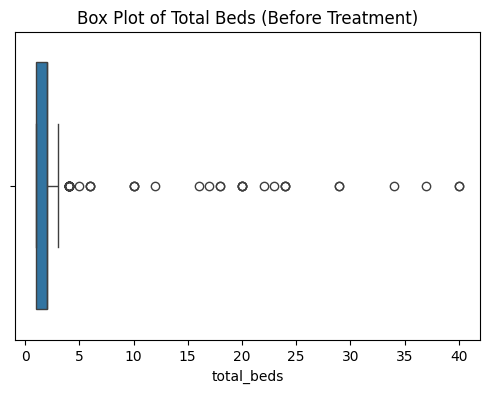

In [57]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['total_beds'])
plt.title("Box Plot of Total Beds (Before Treatment)")
plt.show()

In [58]:
df['total_beds'].value_counts()

total_beds
2.0     687
1.0     628
3.0      50
4.0      22
20.0      4
6.0       3
10.0      3
24.0      3
40.0      2
18.0      2
29.0      2
16.0      1
5.0       1
12.0      1
23.0      1
34.0      1
37.0      1
22.0      1
17.0      1
Name: count, dtype: int64

In [59]:
df['total_beds'].unique()

array([ 1.,  2.,  3.,  4.,  6., 23., 20., 12., 10.,  5., 16., 18., 34.,
       29., 24., 40., 37., 22., 17.])

In [60]:
df['total_beds_log'].unique()

array([0.69314718, 1.09861229, 1.38629436, 1.60943791, 1.94591015,
       3.17805383, 3.04452244, 2.56494936, 2.39789527, 1.79175947,
       2.83321334, 2.94443898, 3.55534806, 3.40119738, 3.21887582,
       3.71357207, 3.63758616, 3.13549422, 2.89037176])

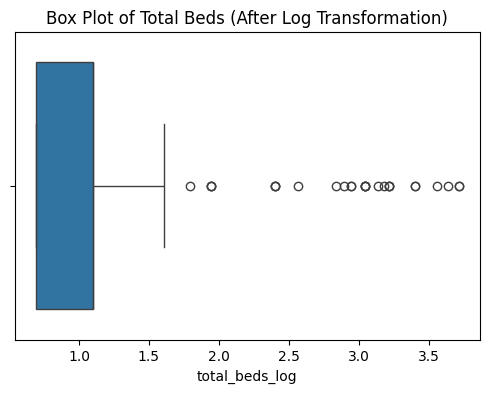

In [61]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['total_beds_log'])
plt.title("Box Plot of Total Beds (After Log Transformation)")
plt.show()

Although the box plot still indicates statistical outliers after transformation, these observations correspond to legitimate dormitory-style accommodations. Since they represent real-world cases and do not negatively impact tree-based models, they were retained. A logarithmic transformation was applied only to stabilize linear regression models.

In [62]:
## Rooms Segregating
def categorize_room_type(room):
    room = str(room).lower()
    
    # 1. Suites & Luxury (Highest Tier)
    if any(x in room for x in ['suite', 'presidential', 'maharaja', 'sultan', 'villa']):
        return 'Suite/Luxury'
    
    # 2. Apartments & Studios
    if any(x in room for x in ['apartment', 'studio', 'house', 'duplex']):
        return 'Apartment/Studio'
    
    # 3. Family & Quadruple (High Capacity)
    if any(x in room for x in ['family', 'quadruple', 'triple']):
        return 'Family/Triple Room'
    
    # 4. Premium & Executive (Mid-High Tier)
    if any(x in room for x in ['premium', 'executive', 'club', 'royal', 'grand', 'heritage', 'elite', 'premier']):
        return 'Premium/Executive'
    
    # 5. Deluxe & Superior (Mid Tier)
    if any(x in room for x in ['deluxe', 'superior', 'luxury', 'boutique', 'super deluxe']):
        return 'Deluxe/Superior'
    
    # 6. Dormitories (Lowest Tier / Shared)
    if any(x in room for x in ['dormitory', 'bunk bed', 'bed in']):
        return 'Dormitory'
    
    # 7. Standard / Budget (Entry Tier)
    if any(x in room for x in ['standard', 'basic', 'economy', 'budget', 'comfort', 'saver', 'single', 'double', 'twin', 'queen', 'king']):
        return 'Standard/Double'
    
    return 'Other'

# Apply the function to create a new column
df['Room_Category'] = df['rooms'].apply(categorize_room_type)

# Check the distribution
print(df['Room_Category'].value_counts())

Room_Category
Family/Triple Room    641
Deluxe/Superior       341
Standard/Double       200
Apartment/Studio      102
Suite/Luxury           69
Premium/Executive      42
Dormitory              18
Other                   1
Name: count, dtype: int64


In [63]:
df.head()

,hotel_name,location,price,original_price,ratings,score,reviews,rooms,beds,breakfast,...,center_distance,tax_charges,center_distance_km,distance_missing,transportation_Facitities,total_beds,is_dormitory,multiple_bed_types,total_beds_log,Room_Category
0,Calabash Luxury Villa Hotel Delhi Airport - Fr...,"Aerocity, New Delhi (Aerocity)",12597.0,31494.0,Exceptional,10.0,3,Double Room,1 double bed,Breakfast included,...,13.6 km from centre,630.0,13.6,0,Airport shuttle (free),1.0,0,0,0.693147,Standard/Double
1,HOTEL UPTOWN with Luxury Restaurant & Rooftop ...,"Paharganj, New Delhi (Chandni Chowk)",31950.0,71000.0,Very good,8.2,878,Family Suite With Window - Perfect For 3-4 Adults,"2 beds (1 single, 1 extra-large double)",No Breakfast included,...,1.4 km from centre,1598.0,1.4,0,Not Available,2.0,0,1,1.098612,Suite/Luxury
2,Holiday Inn New Delhi Aerocity by IHG,"Aerocity, New Delhi (Aerocity)",107131.0,107131.0,Fabulous,8.9,7271,One King Bed Standard - Non Smoking Pool view,1 extra-large double bed,No Breakfast included,...,13.5 km from centre,22498.0,13.5,0,Swimming pool,1.0,0,0,0.693147,Standard/Double
3,Hotel Pearl Plaza - In City Centre Connaught P...,"Paharganj, New Delhi (Chandni Chowk)",19081.0,23852.0,Fabulous,8.6,384,Superior Triple Room,"2 beds (1 single, 1 large double)",No Breakfast included,...,1.4 km from centre,954.0,1.4,0,Free parking,2.0,0,1,1.098612,Family/Triple Room
4,The Tivoli New Delhi,"Chattarpur, New Delhi",70000.0,140000.0,Good,7.9,73,Deluxe Double Room,1 double bed,No Breakfast included,...,15.8 km from centre,12600.0,15.8,0,Swimming pool,1.0,0,0,0.693147,Deluxe/Superior


In [64]:
df.columns

Index(['hotel_name', 'location', 'price', 'original_price', 'ratings', 'score',
       'reviews', 'rooms', 'beds', 'breakfast', 'metro_access',
       'cancellation_policy', 'center_distance', 'tax_charges',
       'center_distance_km', 'distance_missing', 'transportation_Facitities',
       'total_beds', 'is_dormitory', 'multiple_bed_types', 'total_beds_log',
       'Room_Category'],
      dtype='object')

In [65]:
df['is_dormitory'].value_counts()

is_dormitory
0    1403
1      11
Name: count, dtype: int64

In [66]:
df['multiple_bed_types'].value_counts()

multiple_bed_types
0    956
1    458
Name: count, dtype: int64

In [67]:
df['distance_missing'].value_counts()

distance_missing
0    898
1    516
Name: count, dtype: int64

In [68]:
df['center_distance_km'].isna().sum()

np.int64(0)

In [69]:
df['location'].unique()

array(['Aerocity, New Delhi (Aerocity)',
       'Paharganj, New Delhi (Chandni Chowk)', 'Chattarpur, New Delhi',
       'New Delhi', 'Central Delhi, New Delhi', 'Chanakyapuri, New Delhi',
       'Saket, New Delhi', 'West Delhi, New Delhi (Hari Nagar)',
       'Pashim Vihar, New Delhi', 'Sundar Nagar, New Delhi',
       'Janakpuri, New Delhi', 'Dwarka, New Delhi',
       'Connaught Place, New Delhi', 'Mahipalpur, New Delhi',
       'New Friends Colony, New Delhi', 'Nehru Place, New Delhi',
       'Mayur Vihar Phase 1, New Delhi', 'Rohini, New Delhi',
       'West Delhi, New Delhi',
       'Chandni Chowk, New Delhi (Chandni Chowk)',
       'Safdarjung Enclave, New Delhi', 'Patparganj, New Delhi',
       'South Delhi, New Delhi', 'Karol bagh, New Delhi',
       'East Delhi, New Delhi', 'South West, New Delhi',
       'Hauz Khas, New Delhi', 'Greater Kailash 1, New Delhi',
       'Malviya Nagar, New Delhi',
       'Dariyaganj, New Delhi (Chandni Chowk)', 'North Delhi, New Delhi',
       'C

In [70]:
# dividing location into district
# Define the categorization logic
def categorize_delhi_location(loc):
    loc = str(loc).lower()
    
    # 1. Identify NCR (Outside Delhi)
    if any(x in loc for x in ['ghaziabad', 'noida', 'gurgaon', 'faridabad']):
        return 'NCR'
    
    # 2. Identify Specific Districts
    if 'east delhi' in loc or 'mayur vihar' in loc or 'patparganj' in loc:
        return 'East Delhi'
    
    if 'west delhi' in loc or 'janakpuri' in loc or 'dwarka' in loc or 'pashim vihar' in loc:
        return 'West Delhi'
    
    if 'north delhi' in loc or 'rohini' in loc:
        return 'North Delhi'
    
    if 'south delhi' in loc or 'saket' in loc or 'chattarpur' in loc or 'hauz khas' in loc or 'malviya nagar' in loc or 'greater kailash' in loc:
        return 'South Delhi'
    
    if 'central delhi' in loc or 'paharganj' in loc or 'chandni chowk' in loc or 'dariyaganj' in loc:
        return 'Central Delhi'
    
    if 'south west' in loc or 'aerocity' in loc or 'mahipalpur' in loc:
        return 'South West Delhi'
    
    # 3. Specific Areas usually associated with New Delhi (Lutyens/Connaught)
    if any(x in loc for x in ['chanakyapuri', 'connaught place', 'safdarjung', 'nehru place', 'new friends colony', 'sundar nagar']):
        return 'New Delhi'
    
    # 4. Fallback if only 'New Delhi' or 'Delhi' is mentioned
    return 'Other Delhi'

# Apply the function to your dataframe
df['District'] = df['location'].apply(categorize_delhi_location)

# Check the results
print(df['District'].value_counts())

District
Central Delhi       503
Other Delhi         409
South West Delhi    163
South Delhi          83
West Delhi           75
New Delhi            68
North Delhi          59
East Delhi           50
NCR                   4
Name: count, dtype: int64


In [71]:
df.head(3)

,hotel_name,location,price,original_price,ratings,score,reviews,rooms,beds,breakfast,...,tax_charges,center_distance_km,distance_missing,transportation_Facitities,total_beds,is_dormitory,multiple_bed_types,total_beds_log,Room_Category,District
0,Calabash Luxury Villa Hotel Delhi Airport - Fr...,"Aerocity, New Delhi (Aerocity)",12597.0,31494.0,Exceptional,10.0,3,Double Room,1 double bed,Breakfast included,...,630.0,13.6,0,Airport shuttle (free),1.0,0,0,0.693147,Standard/Double,South West Delhi
1,HOTEL UPTOWN with Luxury Restaurant & Rooftop ...,"Paharganj, New Delhi (Chandni Chowk)",31950.0,71000.0,Very good,8.2,878,Family Suite With Window - Perfect For 3-4 Adults,"2 beds (1 single, 1 extra-large double)",No Breakfast included,...,1598.0,1.4,0,Not Available,2.0,0,1,1.098612,Suite/Luxury,Central Delhi
2,Holiday Inn New Delhi Aerocity by IHG,"Aerocity, New Delhi (Aerocity)",107131.0,107131.0,Fabulous,8.9,7271,One King Bed Standard - Non Smoking Pool view,1 extra-large double bed,No Breakfast included,...,22498.0,13.5,0,Swimming pool,1.0,0,0,0.693147,Standard/Double,South West Delhi


In [72]:
df.columns

Index(['hotel_name', 'location', 'price', 'original_price', 'ratings', 'score',
       'reviews', 'rooms', 'beds', 'breakfast', 'metro_access',
       'cancellation_policy', 'center_distance', 'tax_charges',
       'center_distance_km', 'distance_missing', 'transportation_Facitities',
       'total_beds', 'is_dormitory', 'multiple_bed_types', 'total_beds_log',
       'Room_Category', 'District'],
      dtype='object')

In [73]:
df['price_with_tax'] = df['price'] + df['tax_charges']

Visualizations
* Price Distribution

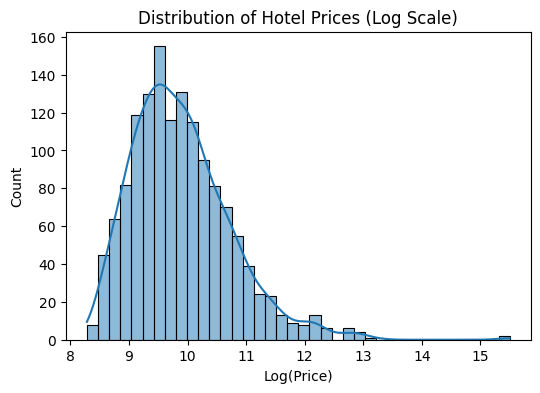

In [74]:
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(df['price']), kde=True)
plt.xlabel("Log(Price)")
plt.title("Distribution of Hotel Prices (Log Scale)")
plt.show()

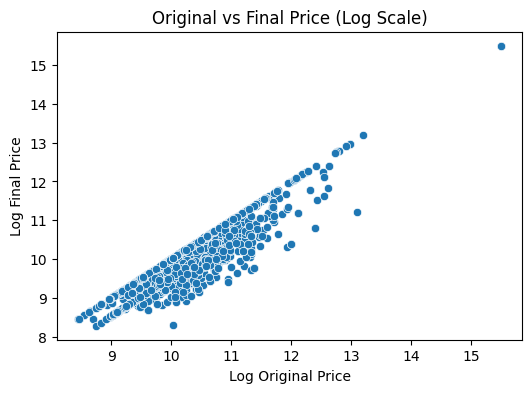

In [75]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=np.log1p(df['original_price']),
    y=np.log1p(df['price'])
)
plt.xlabel("Log Original Price")
plt.ylabel("Log Final Price")
plt.title("Original vs Final Price (Log Scale)")
plt.show()

In [76]:
price_cap = df['price'].quantile(0.99)

df_viz = df[df['price'] <= price_cap]

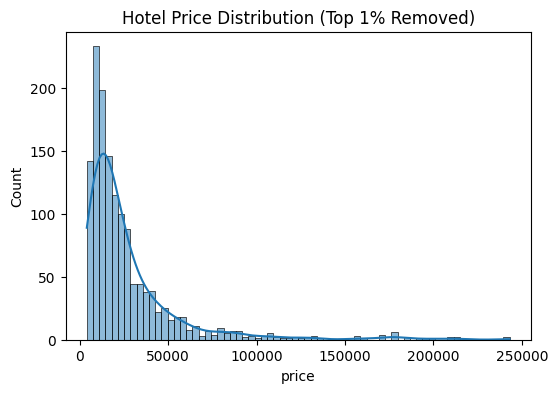

In [77]:
plt.figure(figsize=(6,4))
sns.histplot(df_viz['price'], kde=True)
plt.title("Hotel Price Distribution (Top 1% Removed)")
plt.show()

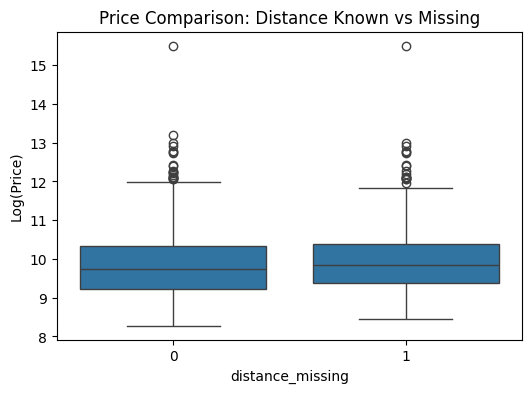

In [78]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='distance_missing',
    y=np.log1p(df['price']),
    data=df
)
plt.ylabel("Log(Price)")
plt.title("Price Comparison: Distance Known vs Missing")
plt.show()

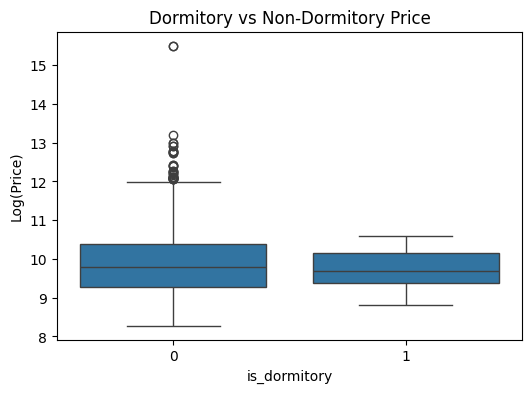

In [79]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='is_dormitory',
    y=np.log1p(df['price']),
    data=df
)
plt.ylabel("Log(Price)")
plt.title("Dormitory vs Non-Dormitory Price")
plt.show()


Hotel prices exhibit a highly right-skewed distribution due to a small number of luxury and dormitory-style accommodations with exceptionally high prices.
To ensure meaningful visual interpretation, logarithmic transformations and percentile-based trimming were applied during exploratory data analysis.

In [80]:
df.columns

Index(['hotel_name', 'location', 'price', 'original_price', 'ratings', 'score',
       'reviews', 'rooms', 'beds', 'breakfast', 'metro_access',
       'cancellation_policy', 'center_distance', 'tax_charges',
       'center_distance_km', 'distance_missing', 'transportation_Facitities',
       'total_beds', 'is_dormitory', 'multiple_bed_types', 'total_beds_log',
       'Room_Category', 'District', 'price_with_tax'],
      dtype='object')

C:\Users\Asus\AppData\Local\Temp\ipykernel_23580\568668984.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='District', y='price_with_tax', palette='Set2')


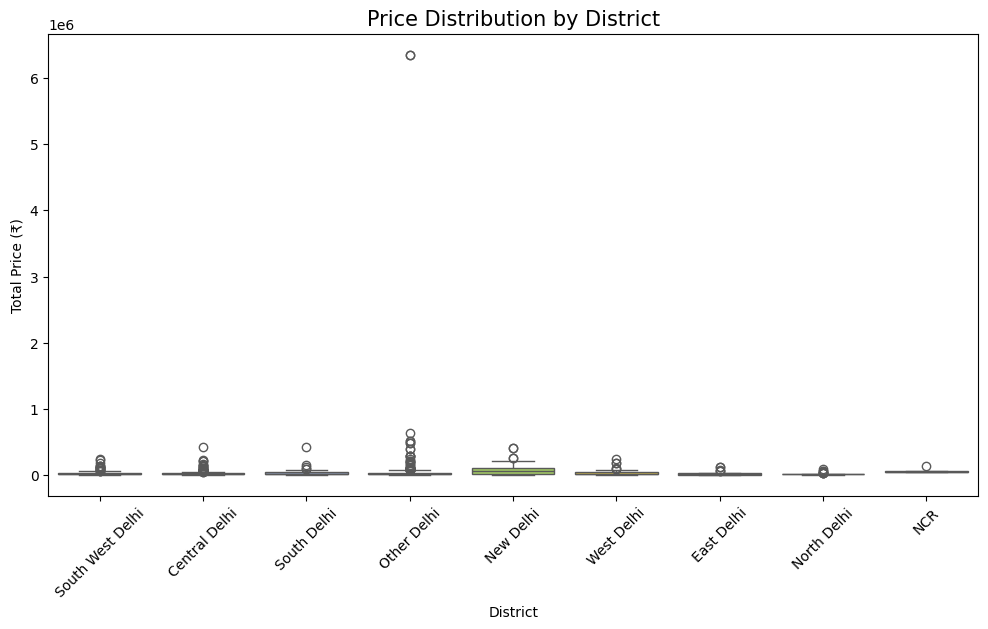

In [81]:
plt.figure(figsize=(12, 6))
# Using a boxplot to see the median price and outliers per district
sns.boxplot(data=df, x='District', y='price_with_tax', palette='Set2')
plt.xticks(rotation=45)
plt.title('Price Distribution by District', fontsize=15)
plt.ylabel('Total Price (₹)')
plt.show()

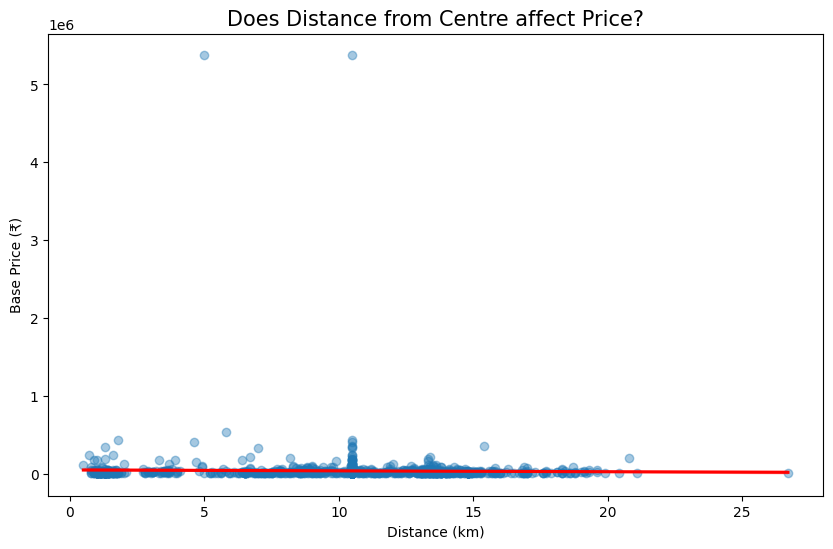

In [82]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='center_distance_km', y='price', 
            scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Does Distance from Centre affect Price?', fontsize=15)
plt.xlabel('Distance (km)')
plt.ylabel('Base Price (₹)')
plt.show()

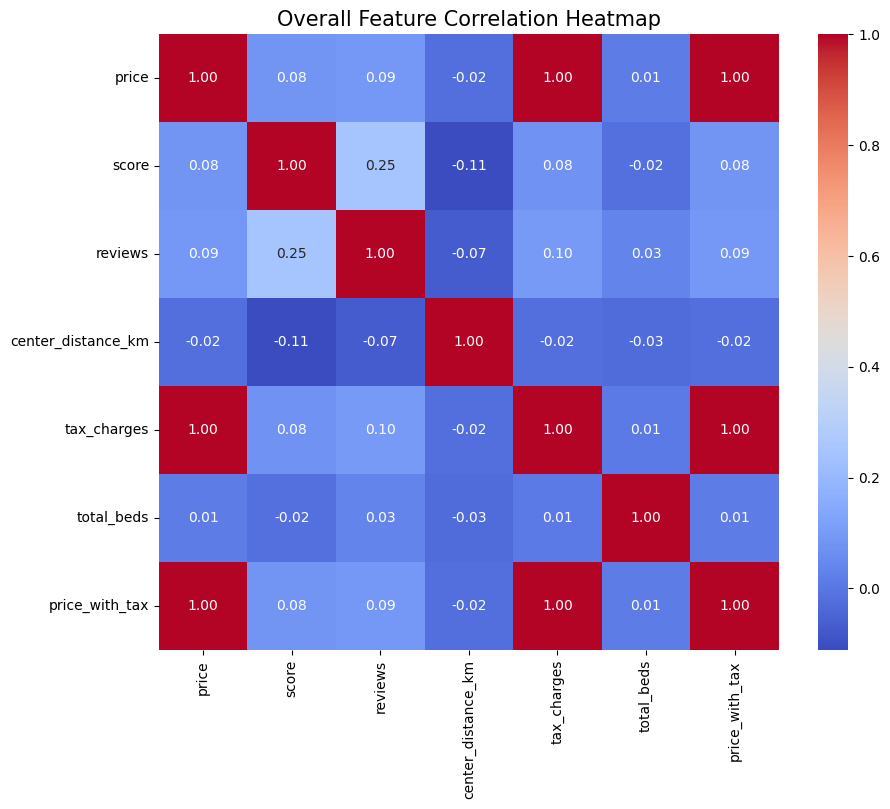

In [83]:
plt.figure(figsize=(10, 8))
# Select only your numerical columns
cols = ['price', 'score', 'reviews', 'center_distance_km', 'tax_charges', 'total_beds', 'price_with_tax']
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Overall Feature Correlation Heatmap', fontsize=15)
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_23580\2316851065.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=district_avg_price, x='District', y='price_with_tax', palette='viridis')


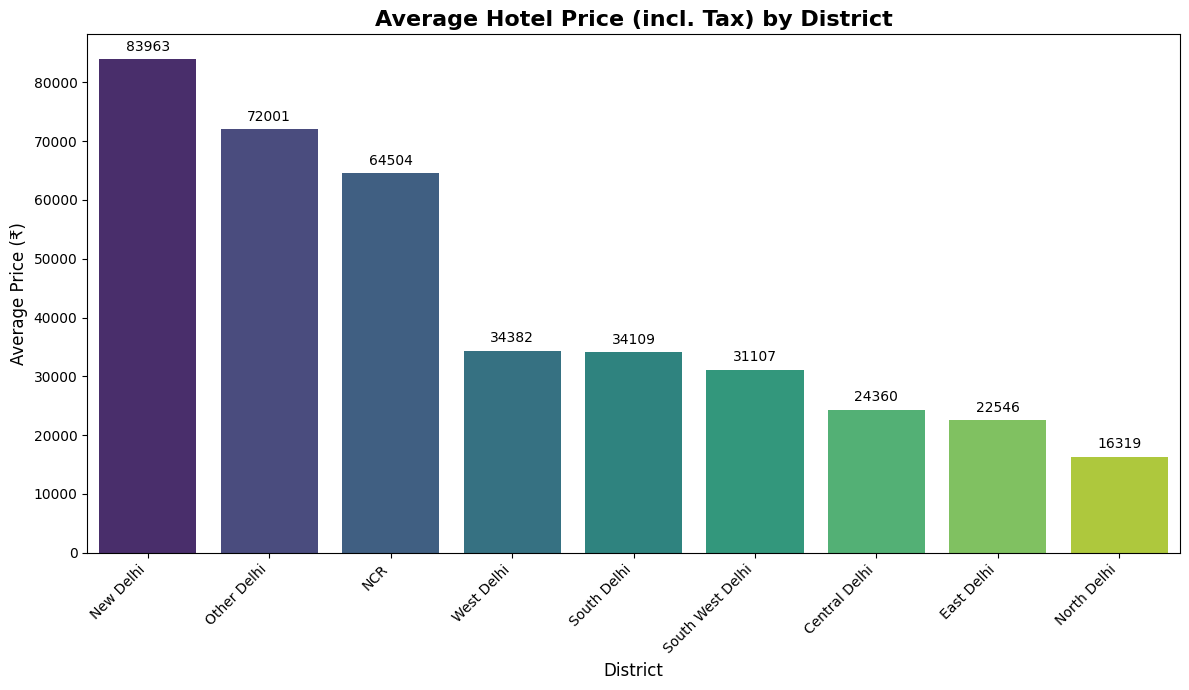

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Group by District and calculate the mean price
district_avg_price = df.groupby('District')['price_with_tax'].mean().sort_values(ascending=False).reset_index()

# 2. Plotting
plt.figure(figsize=(12, 7))
bar_plot = sns.barplot(data=district_avg_price, x='District', y='price_with_tax', palette='viridis')

# 3. Formatting
plt.title('Average Hotel Price (incl. Tax) by District', fontsize=16, fontweight='bold')
plt.xlabel('District', fontsize=12)
plt.ylabel('Average Price (₹)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adding the exact values on top of the bars for better precision
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.tight_layout()
plt.show()

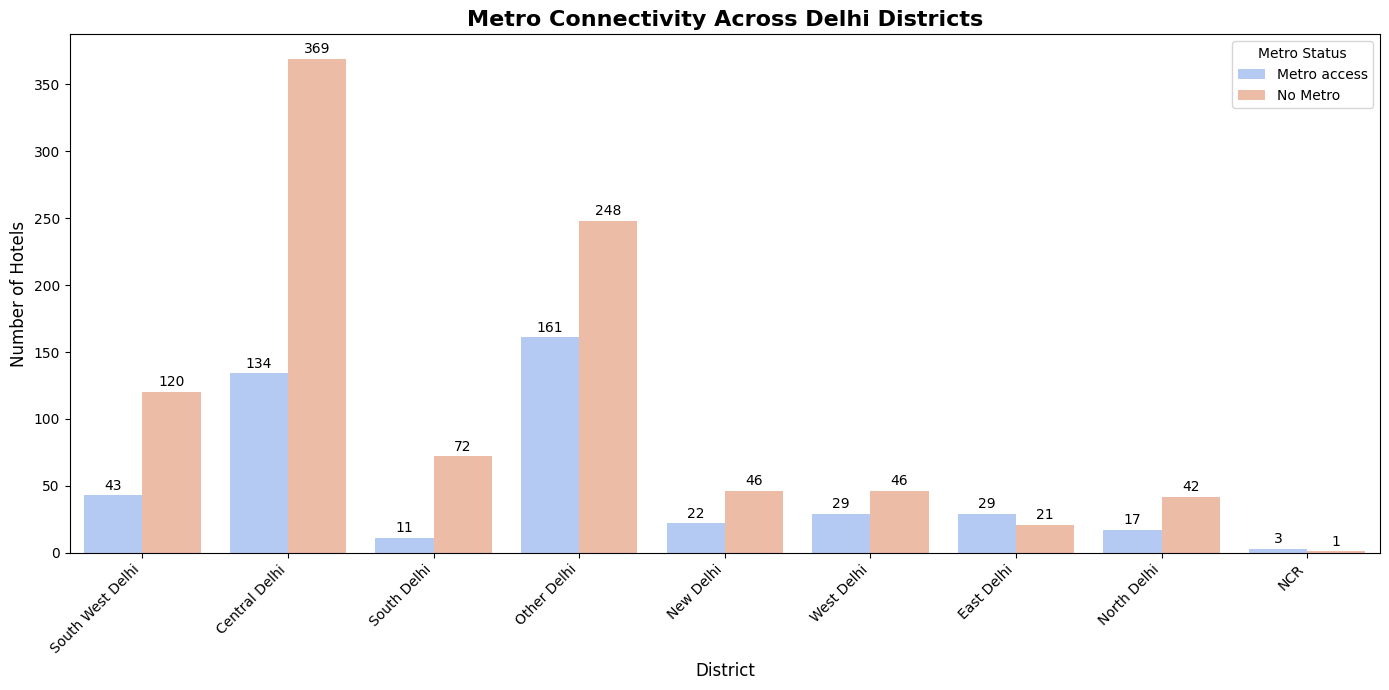

In [85]:
# We use a Count Plot to show the frequency of Metro vs No Metro in each district
plt.figure(figsize=(14, 7))

# 'hue' allows us to split the bars by Metro Access
ax = sns.countplot(data=df, x='District', hue='metro_access', palette='coolwarm')

# Formatting the chart
plt.title('Metro Connectivity Across Delhi Districts', fontsize=16, fontweight='bold')
plt.xlabel('District', fontsize=12)
plt.ylabel('Number of Hotels', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metro Status', loc='upper right')

# Adding count labels on top of the bars
for p in ax.patches:
    if p.get_height() > 0: # Only label if count is more than 0
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 7), 
                    textcoords='offset points',
                    fontsize=10)

plt.tight_layout()
plt.show()

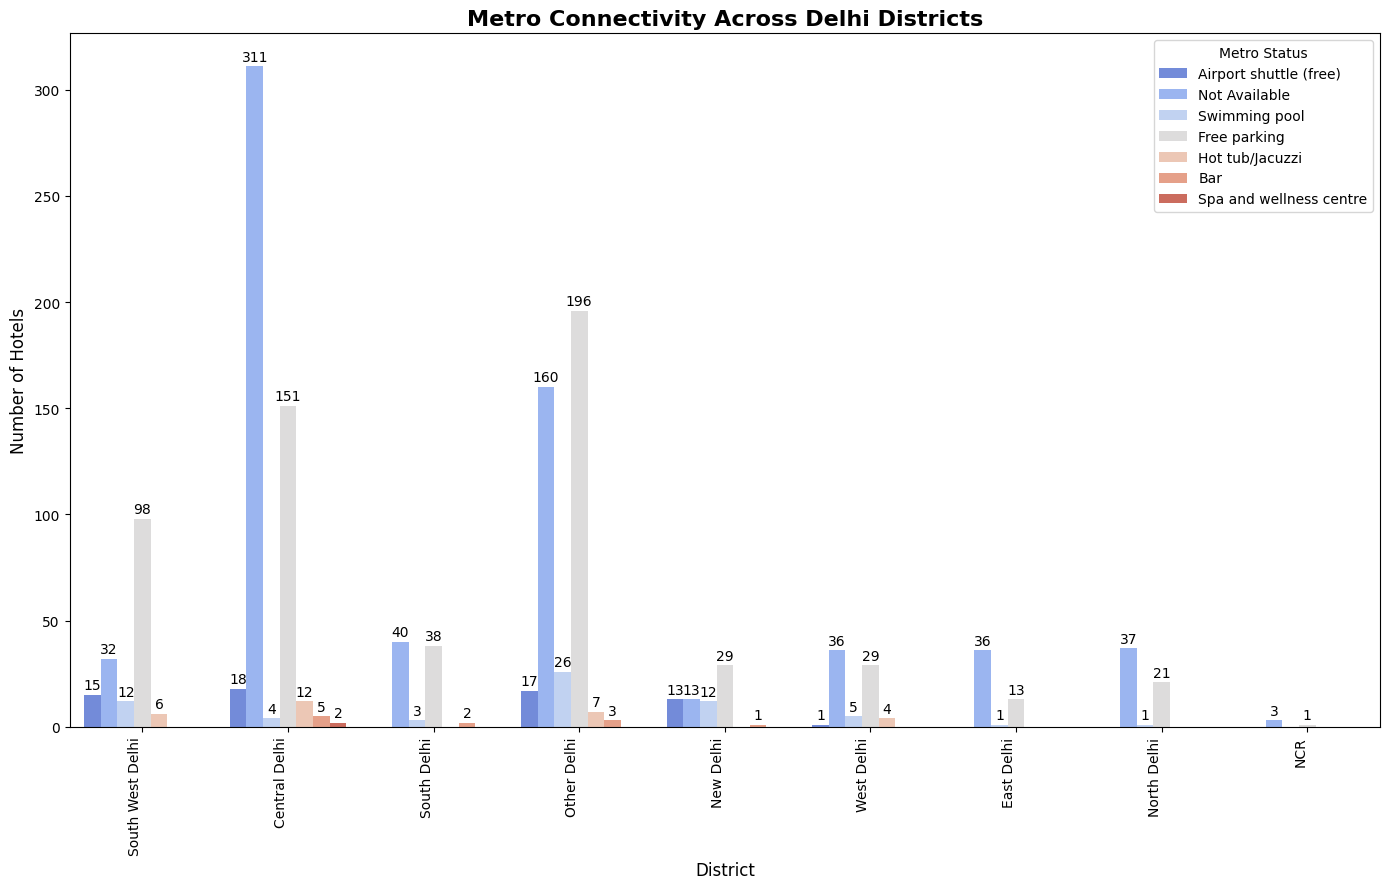

In [86]:
# We use a Count Plot to show the frequency of Metro vs No Metro in each district
plt.figure(figsize=(14, 9))

# 'hue' allows us to split the bars by Metro Access
ax = sns.countplot(data=df, x='District', hue='transportation_Facitities', palette='coolwarm')

# Formatting the chart
plt.title('Metro Connectivity Across Delhi Districts', fontsize=16, fontweight='bold')
plt.xlabel('District', fontsize=12)
plt.ylabel('Number of Hotels', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.legend(title='Metro Status', loc='upper right')

# Adding count labels on top of the bars
for p in ax.patches:
    if p.get_height() > 0: # Only label if count is more than 0
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 7), 
                    textcoords='offset points',
                    fontsize=10)

plt.tight_layout()
plt.show()

In [87]:
df.columns

Index(['hotel_name', 'location', 'price', 'original_price', 'ratings', 'score',
       'reviews', 'rooms', 'beds', 'breakfast', 'metro_access',
       'cancellation_policy', 'center_distance', 'tax_charges',
       'center_distance_km', 'distance_missing', 'transportation_Facitities',
       'total_beds', 'is_dormitory', 'multiple_bed_types', 'total_beds_log',
       'Room_Category', 'District', 'price_with_tax'],
      dtype='object')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1414 entries, 0 to 1417
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hotel_name                 1414 non-null   object 
 1   location                   1414 non-null   object 
 2   price                      1414 non-null   float64
 3   original_price             1414 non-null   float64
 4   ratings                    1414 non-null   object 
 5   score                      1414 non-null   float64
 6   reviews                    1414 non-null   int64  
 7   rooms                      1414 non-null   object 
 8   beds                       1413 non-null   object 
 9   breakfast                  1414 non-null   object 
 10  metro_access               1414 non-null   object 
 11  cancellation_policy        1414 non-null   object 
 12  center_distance            898 non-null    object 
 13  tax_charges                1414 non-null   float64
 1

In [89]:
df.head()

,hotel_name,location,price,original_price,ratings,score,reviews,rooms,beds,breakfast,...,center_distance_km,distance_missing,transportation_Facitities,total_beds,is_dormitory,multiple_bed_types,total_beds_log,Room_Category,District,price_with_tax
0,Calabash Luxury Villa Hotel Delhi Airport - Fr...,"Aerocity, New Delhi (Aerocity)",12597.0,31494.0,Exceptional,10.0,3,Double Room,1 double bed,Breakfast included,...,13.6,0,Airport shuttle (free),1.0,0,0,0.693147,Standard/Double,South West Delhi,13227.0
1,HOTEL UPTOWN with Luxury Restaurant & Rooftop ...,"Paharganj, New Delhi (Chandni Chowk)",31950.0,71000.0,Very good,8.2,878,Family Suite With Window - Perfect For 3-4 Adults,"2 beds (1 single, 1 extra-large double)",No Breakfast included,...,1.4,0,Not Available,2.0,0,1,1.098612,Suite/Luxury,Central Delhi,33548.0
2,Holiday Inn New Delhi Aerocity by IHG,"Aerocity, New Delhi (Aerocity)",107131.0,107131.0,Fabulous,8.9,7271,One King Bed Standard - Non Smoking Pool view,1 extra-large double bed,No Breakfast included,...,13.5,0,Swimming pool,1.0,0,0,0.693147,Standard/Double,South West Delhi,129629.0
3,Hotel Pearl Plaza - In City Centre Connaught P...,"Paharganj, New Delhi (Chandni Chowk)",19081.0,23852.0,Fabulous,8.6,384,Superior Triple Room,"2 beds (1 single, 1 large double)",No Breakfast included,...,1.4,0,Free parking,2.0,0,1,1.098612,Family/Triple Room,Central Delhi,20035.0
4,The Tivoli New Delhi,"Chattarpur, New Delhi",70000.0,140000.0,Good,7.9,73,Deluxe Double Room,1 double bed,No Breakfast included,...,15.8,0,Swimming pool,1.0,0,0,0.693147,Deluxe/Superior,South Delhi,82600.0


In [90]:
df['rooms'].unique()

array(['Double Room', 'Family Suite With Window - Perfect For 3-4 Adults',
       'One King Bed Standard - Non Smoking Pool view',
       'Superior Triple Room', 'Deluxe Double Room', 'Deluxe King Room',
       'Executive Triple Room - Perfect for 3-4 Adults', 'Deluxe Room',
       'Executive Room',
       'Executive Suite - 10% discount on Food & soft beverages, Laundry & Spa',
       'Premium Room with 15% discount on laundry',
       'Superior 01 Double Bed Room, 220 Sq Ft',
       'Royal Junior Suite - 15% Discount on Food & Soft Beverages',
       'Run Of The House',
       'Superior room with 10% off on Food & soft Beverages',
       'Double or Twin Room',
       'Executive Room Double Bed with Breakfast, 15% off on Food and Soft Beverages, Happy Hours (Buy 1 & Get 1) on select menu at InSomnia',
       'Deluxe Family Room', 'Deluxe Family Suite',
       'Premium Double or Twin Room', 'Superior Double Room',
       'Superior Double or Twin Room with 20% discount on Food & Soft Be

In [91]:
df['Room_Category'].value_counts()

Room_Category
Family/Triple Room    641
Deluxe/Superior       341
Standard/Double       200
Apartment/Studio      102
Suite/Luxury           69
Premium/Executive      42
Dormitory              18
Other                   1
Name: count, dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1414 entries, 0 to 1417
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hotel_name                 1414 non-null   object 
 1   location                   1414 non-null   object 
 2   price                      1414 non-null   float64
 3   original_price             1414 non-null   float64
 4   ratings                    1414 non-null   object 
 5   score                      1414 non-null   float64
 6   reviews                    1414 non-null   int64  
 7   rooms                      1414 non-null   object 
 8   beds                       1413 non-null   object 
 9   breakfast                  1414 non-null   object 
 10  metro_access               1414 non-null   object 
 11  cancellation_policy        1414 non-null   object 
 12  center_distance            898 non-null    object 
 13  tax_charges                1414 non-null   float64
 1

In [93]:
df.columns

Index(['hotel_name', 'location', 'price', 'original_price', 'ratings', 'score',
       'reviews', 'rooms', 'beds', 'breakfast', 'metro_access',
       'cancellation_policy', 'center_distance', 'tax_charges',
       'center_distance_km', 'distance_missing', 'transportation_Facitities',
       'total_beds', 'is_dormitory', 'multiple_bed_types', 'total_beds_log',
       'Room_Category', 'District', 'price_with_tax'],
      dtype='object')

In [94]:
# Remove columns 'hotel_name', 'location','rooms', 'beds','center_distance' for now this 

In [95]:
## Dropping Columns 
drop_cols = [
    'hotel_name',        # identifier, no ML value
    'beds',              # raw text (already engineered)
    'center_distance',   # raw text (already converted)
    'total_beds',        # raw count (use log version)
    'price_with_tax',
    'location',
    'rooms'# leakage (derived from price)
]

In [96]:
cat_cols = [
    'District',
    'ratings',
    'breakfast',
    'metro_access',
    'cancellation_policy',
    'transportation_Facitities',
    'Room_Category'
]

In [97]:
y = df['price']

In [98]:
num_cols = [
    'original_price',
    'tax_charges',
    'score',
    'reviews',
    'rooms',
    'center_distance_km',
    'total_beds_log'
]

In [99]:
bin_cols = [
    'distance_missing',
    'is_dormitory',
    'multiple_bed_types'
]

In [100]:
df = df.drop(columns=drop_cols)

In [101]:
# One-hot encode categoricals
df_hot = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [102]:
df_hot.head()

,price,original_price,score,reviews,tax_charges,center_distance_km,distance_missing,is_dormitory,multiple_bed_types,total_beds_log,...,transportation_Facitities_Not Available,transportation_Facitities_Spa and wellness centre,transportation_Facitities_Swimming pool,Room_Category_Deluxe/Superior,Room_Category_Dormitory,Room_Category_Family/Triple Room,Room_Category_Other,Room_Category_Premium/Executive,Room_Category_Standard/Double,Room_Category_Suite/Luxury
0,12597.0,31494.0,10.0,3,630.0,13.6,0,0,0,0.693147,...,False,False,False,False,False,False,False,False,True,False
1,31950.0,71000.0,8.2,878,1598.0,1.4,0,0,1,1.098612,...,True,False,False,False,False,False,False,False,False,True
2,107131.0,107131.0,8.9,7271,22498.0,13.5,0,0,0,0.693147,...,False,False,True,False,False,False,False,False,True,False
3,19081.0,23852.0,8.6,384,954.0,1.4,0,0,1,1.098612,...,False,False,False,False,False,True,False,False,False,False
4,70000.0,140000.0,7.9,73,12600.0,15.8,0,0,0,0.693147,...,False,False,True,True,False,False,False,False,False,False


In [103]:
df.shape

(1414, 17)

In [104]:
df.columns

Index(['price', 'original_price', 'ratings', 'score', 'reviews', 'breakfast',
       'metro_access', 'cancellation_policy', 'tax_charges',
       'center_distance_km', 'distance_missing', 'transportation_Facitities',
       'is_dormitory', 'multiple_bed_types', 'total_beds_log', 'Room_Category',
       'District'],
      dtype='object')

In [105]:
df_hot.columns

Index(['price', 'original_price', 'score', 'reviews', 'tax_charges',
       'center_distance_km', 'distance_missing', 'is_dormitory',
       'multiple_bed_types', 'total_beds_log', 'District_East Delhi',
       'District_NCR', 'District_New Delhi', 'District_North Delhi',
       'District_Other Delhi', 'District_South Delhi',
       'District_South West Delhi', 'District_West Delhi', 'ratings_Fabulous',
       'ratings_Good', 'ratings_Not Available', 'ratings_Review score',
       'ratings_Superb', 'ratings_Very good',
       'breakfast_No Breakfast included', 'metro_access_No Metro',
       'cancellation_policy_No prepayment needed – pay at the property',
       'cancellation_policy_Not Available', 'transportation_Facitities_Bar',
       'transportation_Facitities_Free parking',
       'transportation_Facitities_Hot tub/Jacuzzi',
       'transportation_Facitities_Not Available',
       'transportation_Facitities_Spa and wellness centre',
       'transportation_Facitities_Swimming pool

In [106]:
category_cols = [
    'District',
    'ratings',
    'breakfast',
    'metro_access',
    'cancellation_policy',
    'transportation_Facitities',
    'Room_Category'
]


In [107]:
from sklearn.preprocessing import LabelEncoder

df_rf = df.copy()   # keep a separate dataset for Random Forest

label_encoders = {}

for col in category_cols:
    le = LabelEncoder()
    df_rf[col] = le.fit_transform(df_rf[col].astype(str))
    label_encoders[col] = le


In [108]:
df_rf.head()

,price,original_price,ratings,score,reviews,breakfast,metro_access,cancellation_policy,tax_charges,center_distance_km,distance_missing,transportation_Facitities,is_dormitory,multiple_bed_types,total_beds_log,Room_Category,District
0,12597.0,31494.0,0,10.0,3,0,0,0,630.0,13.6,0,0,0,0,0.693147,6,7
1,31950.0,71000.0,6,8.2,878,1,0,0,1598.0,1.4,0,4,0,1,1.098612,7,0
2,107131.0,107131.0,1,8.9,7271,1,0,1,22498.0,13.5,0,6,0,0,0.693147,6,7
3,19081.0,23852.0,1,8.6,384,1,0,0,954.0,1.4,0,2,0,1,1.098612,3,0
4,70000.0,140000.0,2,7.9,73,1,1,2,12600.0,15.8,0,6,0,0,0.693147,1,6


In [109]:
df_rf.shape

(1414, 17)

In [110]:
# Removing Extreme Outliers Before Training
# This will help with those 2 huge errors
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print(f"Removed {len(df) - len(df_filtered)} outliers")

Removed 120 outliers


In [111]:
X = df_rf.drop('price', axis=1)
y = df_rf['price']

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(

    X,y,test_size=0.2,random_state=42
)

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

In [114]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [115]:
print("Linear Regression R2:", r2_score(y_test, lr_pred))
print("Linear Regression RMSE:", root_mean_squared_error(y_test, lr_pred))

Linear Regression R2: 0.9729635022806266
Linear Regression RMSE: 8398.768303335204


In [116]:
from sklearn.model_selection import cross_val_score

# Check R2 across 5 different folds of data
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
print(f"Average Cross-Val R2: {scores.mean():.2f}")
print(f"Standard Deviation: {scores.std():.2f}")

Average Cross-Val R2: 0.98
Standard Deviation: 0.02


In [117]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)

print("Ridge R2:", r2_score(y_test, ridge_pred))

Ridge R2: 0.9729551889836694


In [118]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)

print("Lasso R2:", r2_score(y_test, lasso_pred))

Lasso R2: 0.9729638276772224


C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.704e+10, tolerance: 5.931e+09
  model = cd_fast.enet_coordinate_descent(


In [119]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, rf_pred))
print("Random Forest RMSE:",root_mean_squared_error(y_test, rf_pred))

Random Forest R2: 0.9702981027671111
Random Forest RMSE: 8803.036036113168


In [120]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

gbr_pred = gbr.predict(X_test)

print("GBR R2:", r2_score(y_test, gbr_pred))

GBR R2: 0.9869713668681753


In [121]:
results = pd.DataFrame({
    'Model': ['Linear', 'Ridge', 'Lasso', 'Random Forest', 'Gradient Boosting'],
    'R2 Score': [
        r2_score(y_test, lr_pred),
        r2_score(y_test, ridge_pred),
        r2_score(y_test, lasso_pred),
        r2_score(y_test, rf_pred),
        r2_score(y_test, gbr_pred)
    ]
})

results

,Model,R2 Score
0,Linear,0.972964
1,Ridge,0.972955
2,Lasso,0.972964
3,Random Forest,0.970298
4,Gradient Boosting,0.986971


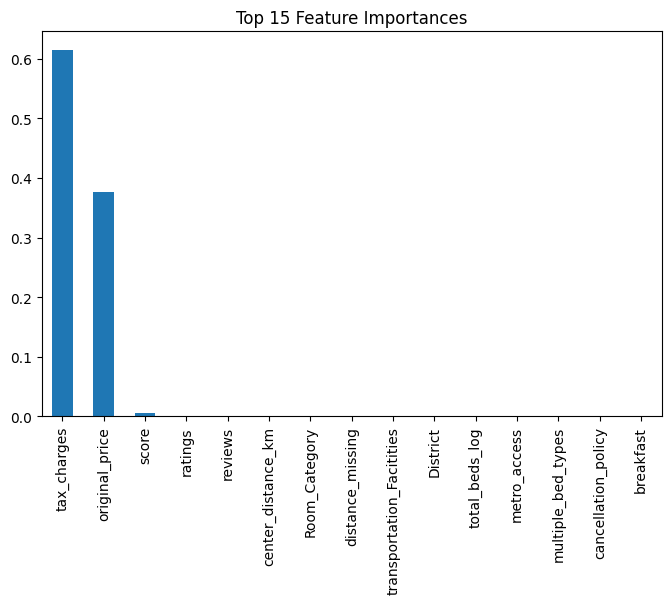

In [122]:
feat_imp = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,5))
feat_imp.head(15).plot(kind='bar')
plt.title("Top 15 Feature Importances")
plt.show()

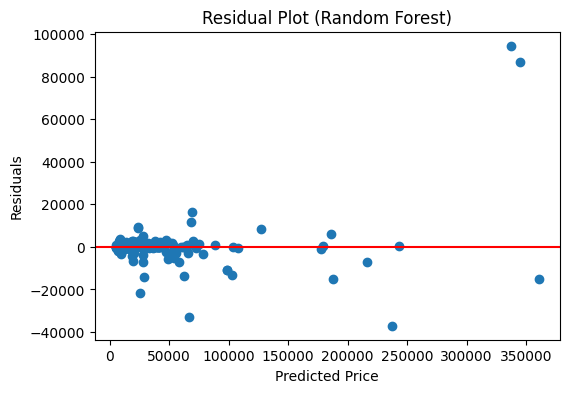

In [123]:
plt.figure(figsize=(6,4))
plt.scatter(rf_pred, y_test - rf_pred)
plt.axhline(0, color='red')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot (Random Forest)")
plt.show()

In [124]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    rf, X, y, cv=5, scoring='r2'
)

print("CV Mean R2:", cv_scores.mean())


CV Mean R2: 0.9457955272411864


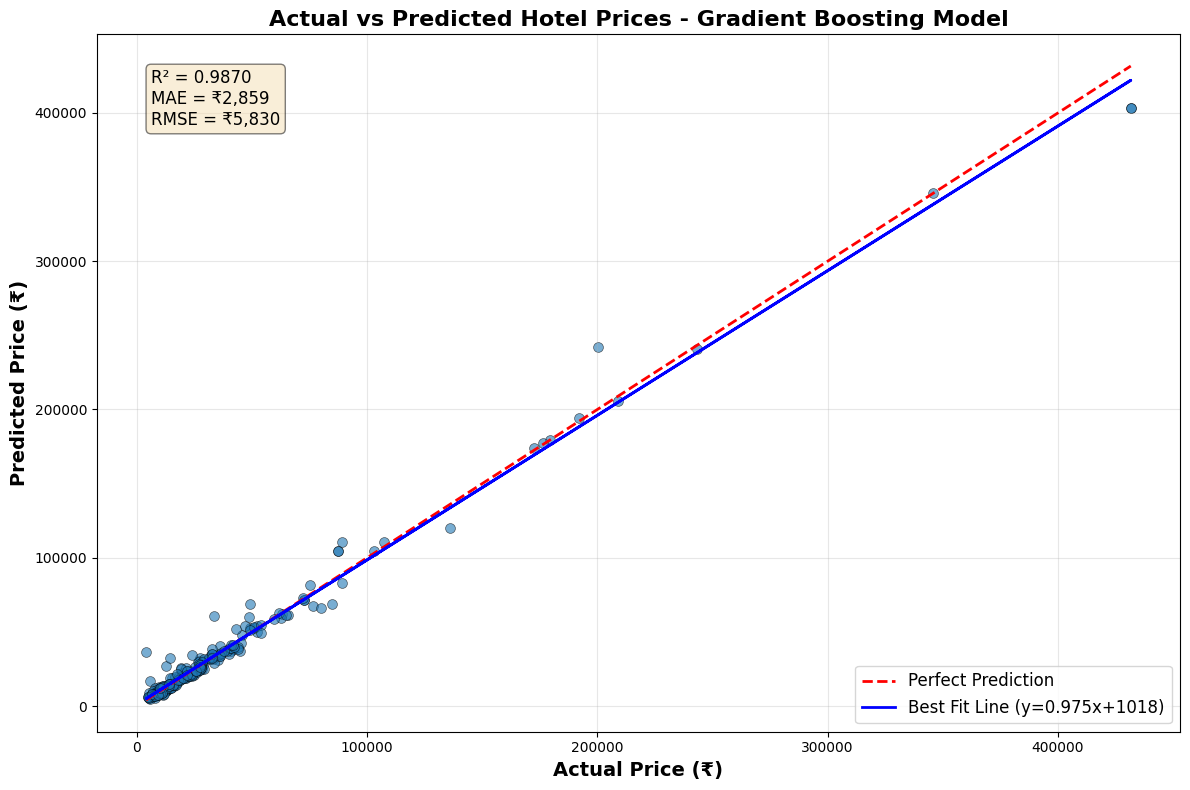

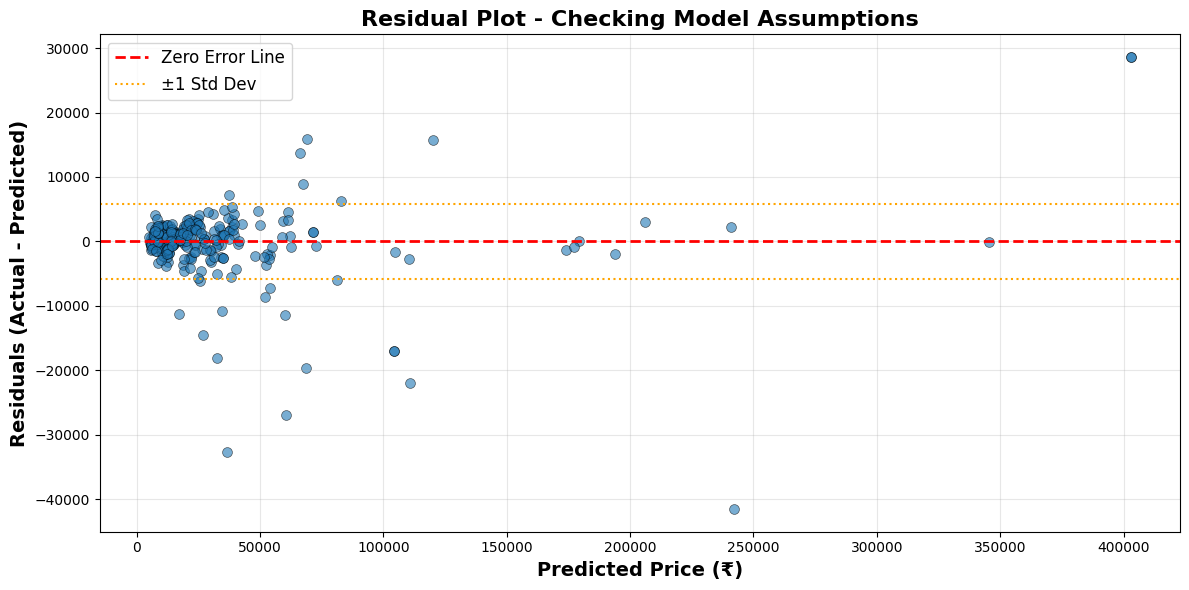

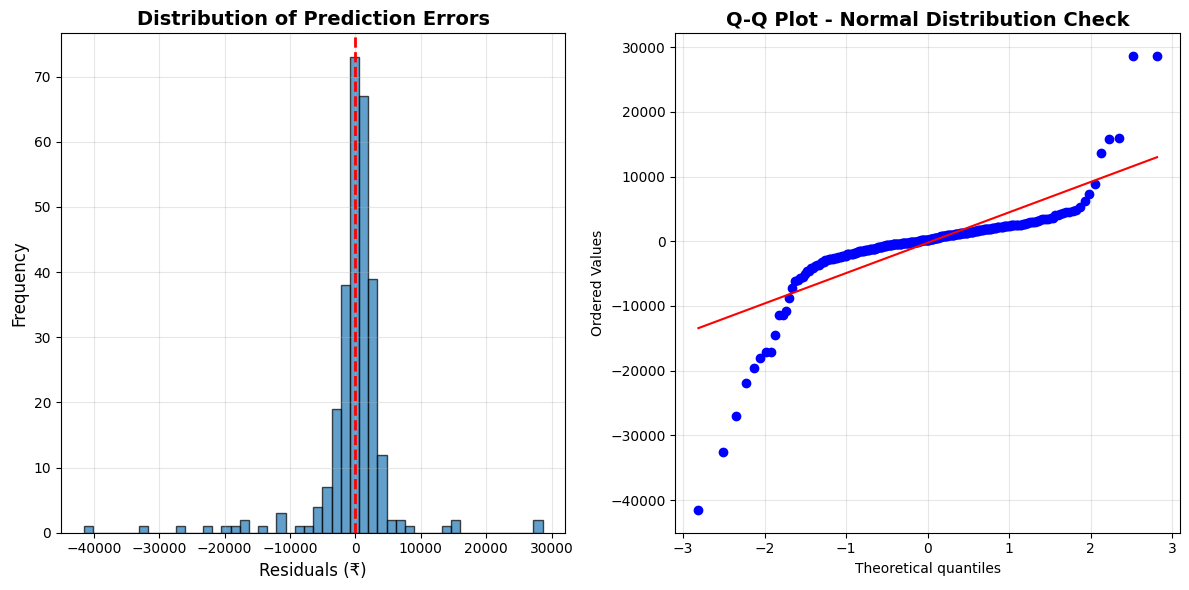

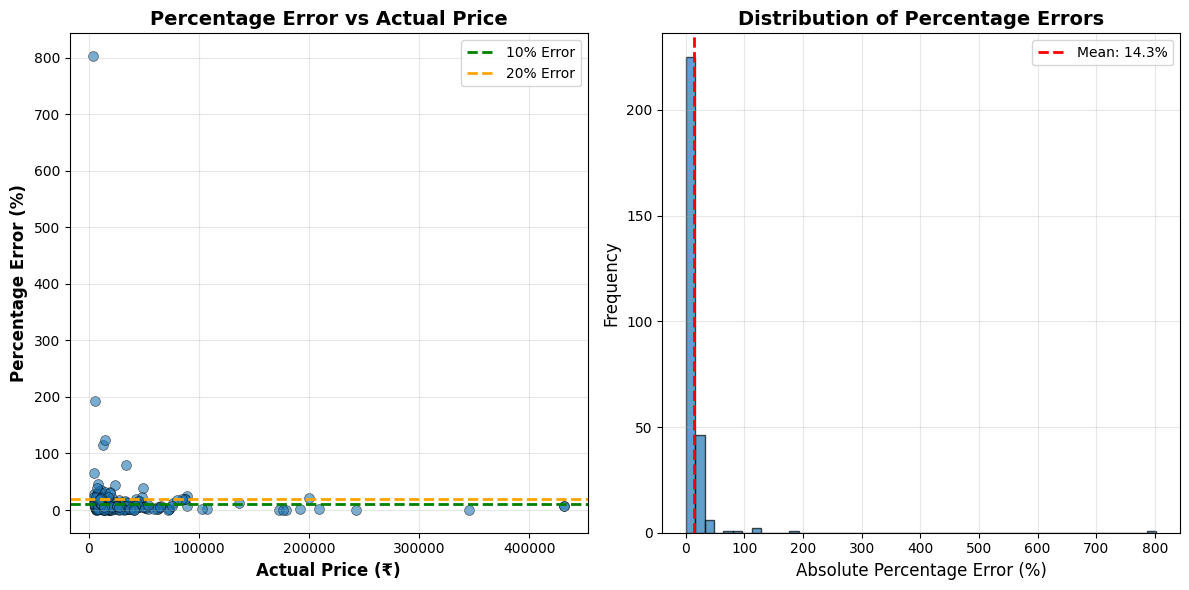


📊 Prediction Accuracy:
   Predictions within ±10% error: 59.0%
   Predictions within ±20% error: 87.6%


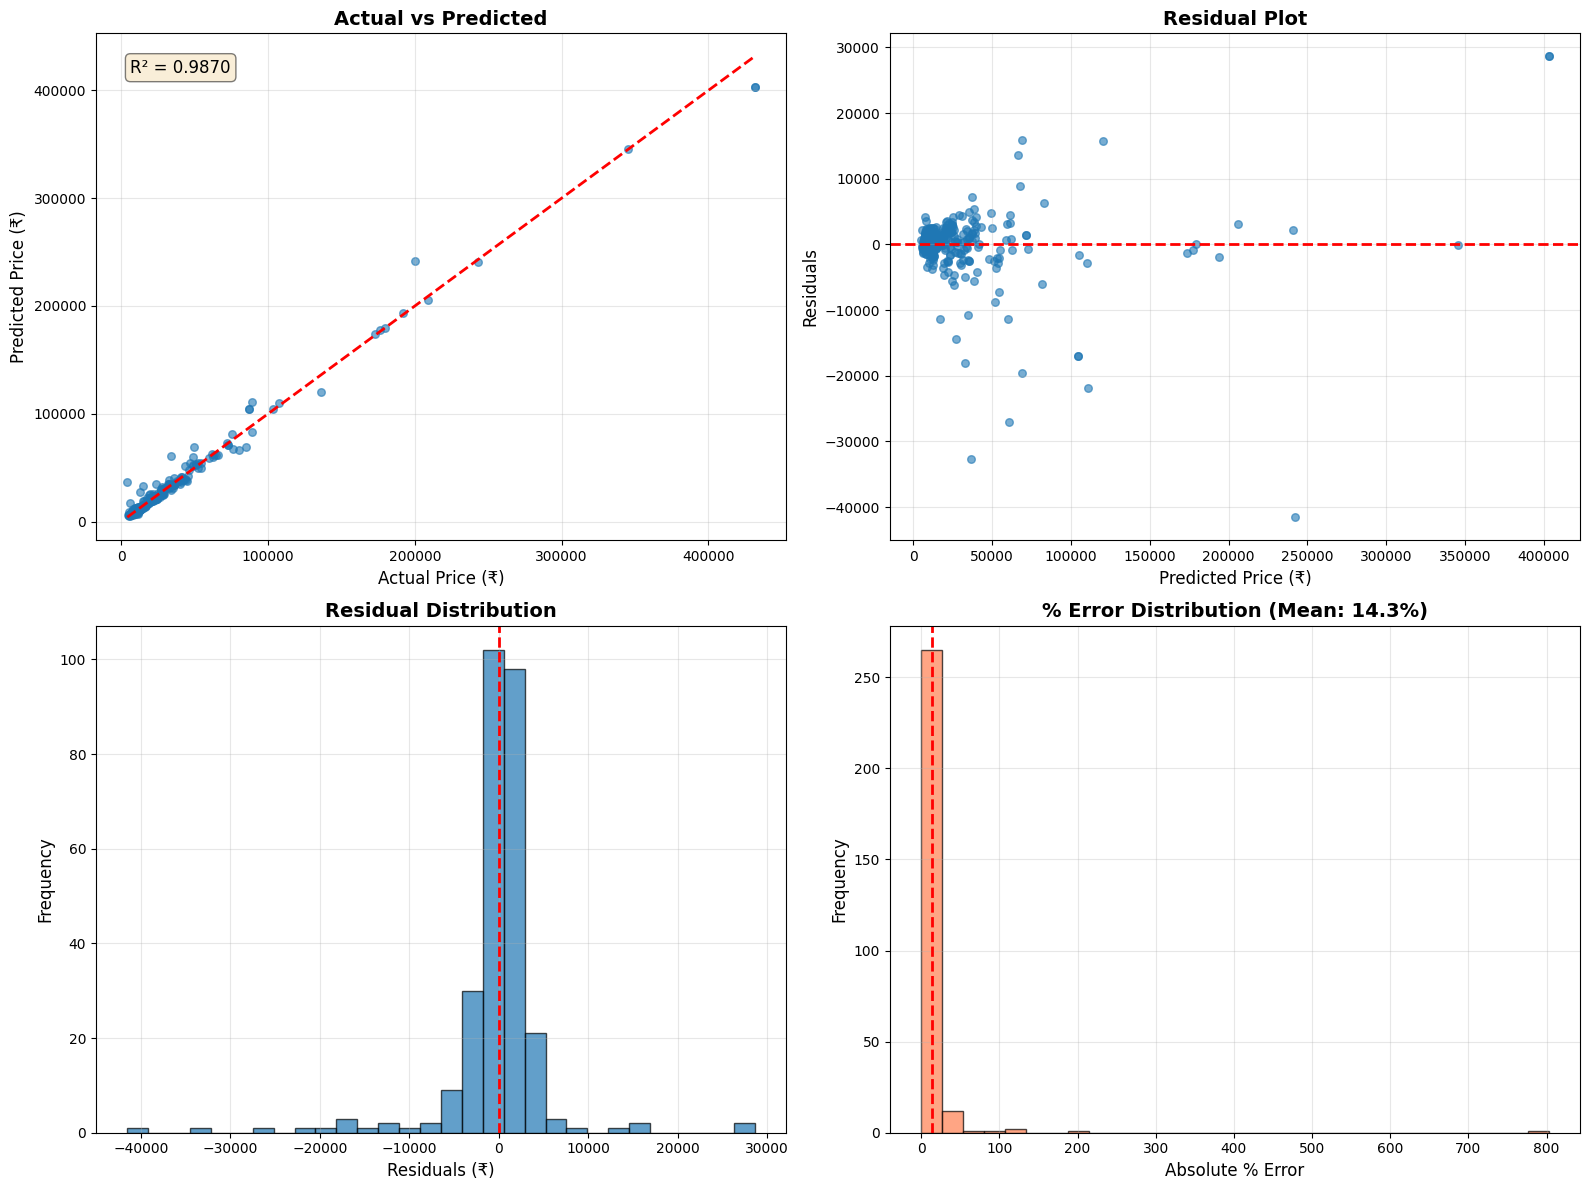

In [125]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have:
# y_test = actual prices
# predictions = your model's predictions (use rf_pred or gbr_pred)

# For this example, let's use Gradient Boosting (your best model)
predictions = gbr_pred  # Change to rf_pred if using Random Forest

# =============================================================================
# 1. ACTUAL VS PREDICTED - SCATTER PLOT WITH BEST FIT LINE
# =============================================================================

plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(y_test, predictions, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

# Perfect prediction line (45-degree line)
min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

# Add best fit line for your predictions
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "b-", linewidth=2, label=f'Best Fit Line (y={z[0]:.3f}x+{z[1]:.0f})')

# Labels and title
plt.xlabel('Actual Price (₹)', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Price (₹)', fontsize=14, fontweight='bold')
plt.title('Actual vs Predicted Hotel Prices - Gradient Boosting Model', fontsize=16, fontweight='bold')

# Add metrics as text
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

textstr = f'R² = {r2:.4f}\nMAE = ₹{mae:,.0f}\nRMSE = ₹{rmse:,.0f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================================================
# 2. RESIDUAL PLOT (Enhanced Version)
# =============================================================================

residuals = y_test - predictions

plt.figure(figsize=(12, 6))

# Scatter plot of residuals
plt.scatter(predictions, residuals, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2, label='Zero Error Line')

# Add horizontal lines at ±1 standard deviation
std_residual = np.std(residuals)
plt.axhline(y=std_residual, color='orange', linestyle=':', linewidth=1.5, label='±1 Std Dev')
plt.axhline(y=-std_residual, color='orange', linestyle=':', linewidth=1.5)

plt.xlabel('Predicted Price (₹)', fontsize=14, fontweight='bold')
plt.ylabel('Residuals (Actual - Predicted)', fontsize=14, fontweight='bold')
plt.title('Residual Plot - Checking Model Assumptions', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================================================
# 3. DISTRIBUTION OF PREDICTION ERRORS
# =============================================================================

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(residuals, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Residuals (₹)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Prediction Errors', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot - Normal Distribution Check', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 4. ERROR PERCENTAGE ANALYSIS
# =============================================================================

# Calculate percentage error
percentage_error = np.abs((y_test - predictions) / y_test) * 100

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, percentage_error, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
plt.axhline(y=10, color='green', linestyle='--', linewidth=2, label='10% Error')
plt.axhline(y=20, color='orange', linestyle='--', linewidth=2, label='20% Error')
plt.xlabel('Actual Price (₹)', fontsize=12, fontweight='bold')
plt.ylabel('Percentage Error (%)', fontsize=12, fontweight='bold')
plt.title('Percentage Error vs Actual Price', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(percentage_error, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(x=percentage_error.mean(), color='r', linestyle='--', 
            linewidth=2, label=f'Mean: {percentage_error.mean():.1f}%')
plt.xlabel('Absolute Percentage Error (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Percentage Errors', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print percentage of predictions within error bounds
within_10_pct = (percentage_error <= 10).sum() / len(percentage_error) * 100
within_20_pct = (percentage_error <= 20).sum() / len(percentage_error) * 100

print(f"\n📊 Prediction Accuracy:")
print(f"   Predictions within ±10% error: {within_10_pct:.1f}%")
print(f"   Predictions within ±20% error: {within_20_pct:.1f}%")

# =============================================================================
# 5. COMBINED VISUALIZATION - ALL IN ONE
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Actual vs Predicted
axes[0, 0].scatter(y_test, predictions, alpha=0.6, s=30)
axes[0, 0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
axes[0, 0].set_xlabel('Actual Price (₹)', fontsize=12)
axes[0, 0].set_ylabel('Predicted Price (₹)', fontsize=12)
axes[0, 0].set_title('Actual vs Predicted', fontsize=14, fontweight='bold')
axes[0, 0].text(0.05, 0.95, f'R² = {r2:.4f}', transform=axes[0, 0].transAxes,
                fontsize=12, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residuals
axes[0, 1].scatter(predictions, residuals, alpha=0.6, s=30)
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Price (₹)', fontsize=12)
axes[0, 1].set_ylabel('Residuals', fontsize=12)
axes[0, 1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Residual Distribution
axes[1, 0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuals (₹)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Residual Distribution', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Percentage Error
axes[1, 1].hist(percentage_error, bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[1, 1].axvline(x=percentage_error.mean(), color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Absolute % Error', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].set_title(f'% Error Distribution (Mean: {percentage_error.mean():.1f}%)', 
                     fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


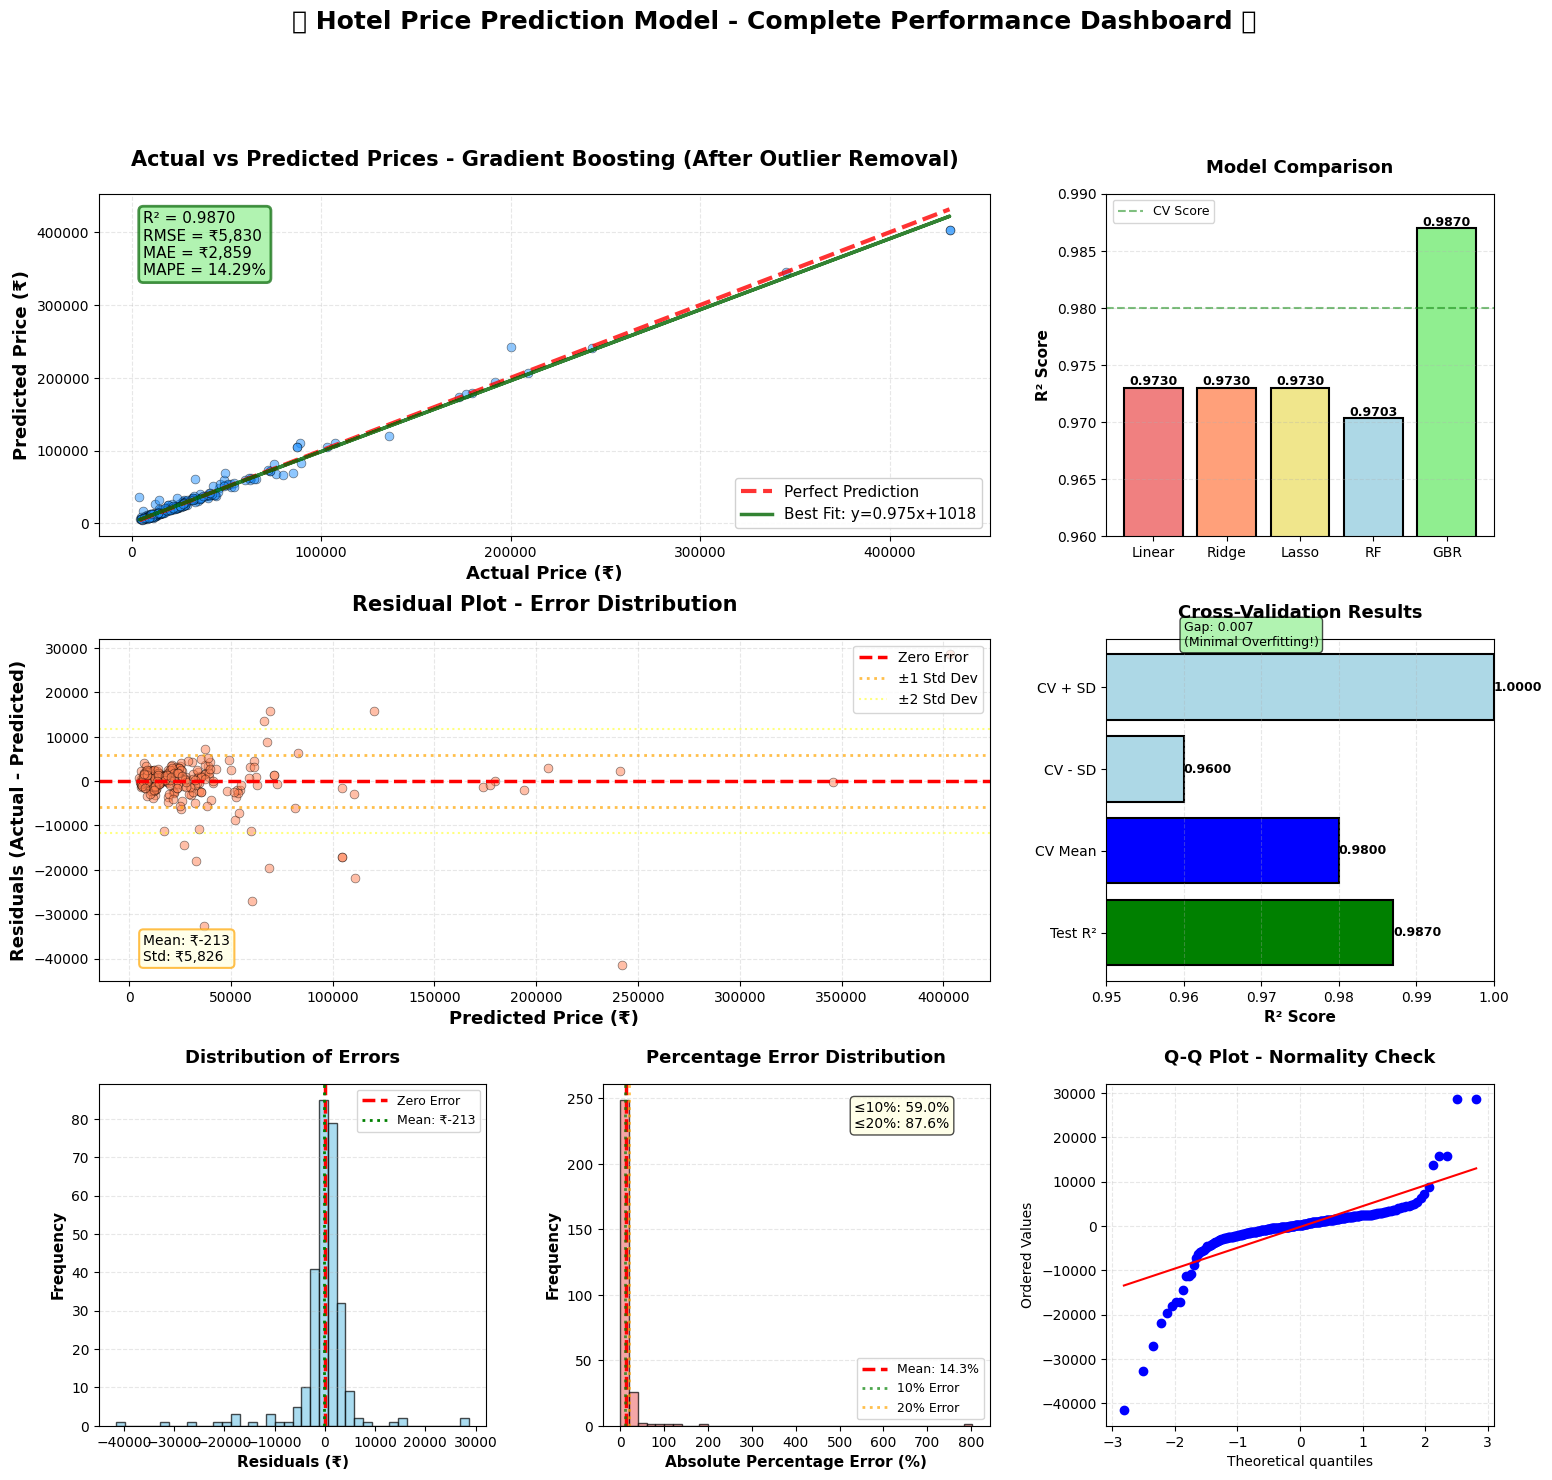

In [126]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Use your best model (Gradient Boosting)
predictions = gbr_pred
actual = y_test

# Calculate metrics
r2 = r2_score(actual, predictions)
mae = mean_absolute_error(actual, predictions)
rmse = np.sqrt(mean_squared_error(actual, predictions))
mape = np.mean(np.abs((actual - predictions) / actual)) * 100

# =============================================================================
# COMPREHENSIVE VISUALIZATION DASHBOARD
# =============================================================================

fig = plt.figure(figsize=(18, 16))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# ------------------------ Plot 1: Actual vs Predicted ------------------------
ax1 = fig.add_subplot(gs[0, :2])

# Scatter plot
ax1.scatter(actual, predictions, alpha=0.5, s=40, edgecolors='black', linewidth=0.5, color='dodgerblue')

# Perfect prediction line
min_val = min(actual.min(), predictions.min())
max_val = max(actual.max(), predictions.max())
ax1.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=3, label='Perfect Prediction', alpha=0.8)

# Best fit line
z = np.polyfit(actual, predictions, 1)
p = np.poly1d(z)
ax1.plot(actual, p(actual), "darkgreen", linewidth=2.5, 
         label=f'Best Fit: y={z[0]:.3f}x+{z[1]:.0f}', alpha=0.8)

ax1.set_xlabel('Actual Price (₹)', fontsize=13, fontweight='bold')
ax1.set_ylabel('Predicted Price (₹)', fontsize=13, fontweight='bold')
ax1.set_title('Actual vs Predicted Prices - Gradient Boosting (After Outlier Removal)', 
              fontsize=15, fontweight='bold', pad=20)

# Metrics box
metrics_text = f'R² = {r2:.4f}\nRMSE = ₹{rmse:,.0f}\nMAE = ₹{mae:,.0f}\nMAPE = {mape:.2f}%'
ax1.text(0.05, 0.95, metrics_text, transform=ax1.transAxes, 
         fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7, edgecolor='darkgreen', linewidth=2))

ax1.legend(loc='lower right', fontsize=11, framealpha=0.9)
ax1.grid(True, alpha=0.3, linestyle='--')

# ------------------------ Plot 2: Model Comparison Bar Chart ------------------------
ax2 = fig.add_subplot(gs[0, 2])

models_data = {
    'Linear': 0.972964,
    'Ridge': 0.972955,
    'Lasso': 0.972964,
    'RF': 0.970298,
    'GBR': 0.986971
}

colors = ['lightcoral', 'lightsalmon', 'khaki', 'lightblue', 'lightgreen']
bars = ax2.bar(models_data.keys(), models_data.values(), color=colors, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

ax2.set_ylabel('R² Score', fontsize=11, fontweight='bold')
ax2.set_title('Model Comparison', fontsize=13, fontweight='bold', pad=15)
ax2.set_ylim([0.96, 0.99])
ax2.grid(True, alpha=0.3, axis='y', linestyle='--')
ax2.axhline(y=0.98, color='green', linestyle='--', linewidth=1.5, alpha=0.5, label='CV Score')
ax2.legend(fontsize=9)

# ------------------------ Plot 3: Residual Plot ------------------------
ax3 = fig.add_subplot(gs[1, :2])

residuals = actual - predictions
ax3.scatter(predictions, residuals, alpha=0.5, s=40, edgecolors='black', linewidth=0.5, color='coral')
ax3.axhline(y=0, color='red', linestyle='--', linewidth=2.5, label='Zero Error')

# Standard deviation bands
std_res = np.std(residuals)
ax3.axhline(y=std_res, color='orange', linestyle=':', linewidth=2, alpha=0.7, label='±1 Std Dev')
ax3.axhline(y=-std_res, color='orange', linestyle=':', linewidth=2, alpha=0.7)
ax3.axhline(y=2*std_res, color='yellow', linestyle=':', linewidth=1.5, alpha=0.5, label='±2 Std Dev')
ax3.axhline(y=-2*std_res, color='yellow', linestyle=':', linewidth=1.5, alpha=0.5)

ax3.set_xlabel('Predicted Price (₹)', fontsize=13, fontweight='bold')
ax3.set_ylabel('Residuals (Actual - Predicted)', fontsize=13, fontweight='bold')
ax3.set_title('Residual Plot - Error Distribution', fontsize=15, fontweight='bold', pad=20)
ax3.legend(fontsize=10, loc='upper right')
ax3.grid(True, alpha=0.3, linestyle='--')

# Add text with residual stats
res_text = f'Mean: ₹{np.mean(residuals):,.0f}\nStd: ₹{std_res:,.0f}'
ax3.text(0.05, 0.05, res_text, transform=ax3.transAxes, 
         fontsize=10, verticalalignment='bottom',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7, edgecolor='orange', linewidth=1.5))

# ------------------------ Plot 4: Cross-Validation Visualization ------------------------
ax4 = fig.add_subplot(gs[1, 2])

cv_data = {
    'Test R²': 0.987,
    'CV Mean': 0.98,
    'CV - SD': 0.98 - 0.02,
    'CV + SD': 0.98 + 0.02
}

y_pos = np.arange(len(cv_data))
bars = ax4.barh(y_pos, list(cv_data.values()), color=['green', 'blue', 'lightblue', 'lightblue'], 
                edgecolor='black', linewidth=1.5)

for i, bar in enumerate(bars):
    width = bar.get_width()
    ax4.text(width, bar.get_y() + bar.get_height()/2.,
             f'{width:.4f}',
             ha='left', va='center', fontsize=9, fontweight='bold')

ax4.set_yticks(y_pos)
ax4.set_yticklabels(list(cv_data.keys()))
ax4.set_xlabel('R² Score', fontsize=11, fontweight='bold')
ax4.set_title('Cross-Validation Results', fontsize=13, fontweight='bold', pad=15)
ax4.set_xlim([0.95, 1.0])
ax4.grid(True, alpha=0.3, axis='x', linestyle='--')

# Highlight the small gap
gap = 0.987 - 0.98
ax4.text(0.96, 3.5, f'Gap: {gap:.3f}\n(Minimal Overfitting!)', 
         fontsize=9, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# ------------------------ Plot 5: Residual Distribution ------------------------
ax5 = fig.add_subplot(gs[2, 0])

ax5.hist(residuals, bins=40, edgecolor='black', alpha=0.7, color='skyblue')
ax5.axvline(x=0, color='red', linestyle='--', linewidth=2.5, label='Zero Error')
ax5.axvline(x=np.mean(residuals), color='green', linestyle=':', linewidth=2, 
            label=f'Mean: ₹{np.mean(residuals):,.0f}')

ax5.set_xlabel('Residuals (₹)', fontsize=11, fontweight='bold')
ax5.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax5.set_title('Distribution of Errors', fontsize=13, fontweight='bold', pad=15)
ax5.legend(fontsize=9)
ax5.grid(True, alpha=0.3, axis='y', linestyle='--')

# ------------------------ Plot 6: Percentage Error Distribution ------------------------
ax6 = fig.add_subplot(gs[2, 1])

pct_error = np.abs((actual - predictions) / actual) * 100
ax6.hist(pct_error, bins=40, edgecolor='black', alpha=0.7, color='lightcoral')
ax6.axvline(x=np.mean(pct_error), color='red', linestyle='--', linewidth=2.5, 
            label=f'Mean: {np.mean(pct_error):.1f}%')
ax6.axvline(x=10, color='green', linestyle=':', linewidth=2, alpha=0.7, label='10% Error')
ax6.axvline(x=20, color='orange', linestyle=':', linewidth=2, alpha=0.7, label='20% Error')

ax6.set_xlabel('Absolute Percentage Error (%)', fontsize=11, fontweight='bold')
ax6.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax6.set_title('Percentage Error Distribution', fontsize=13, fontweight='bold', pad=15)
ax6.legend(fontsize=9)
ax6.grid(True, alpha=0.3, axis='y', linestyle='--')

# Calculate percentage within thresholds
within_10 = (pct_error <= 10).sum() / len(pct_error) * 100
within_20 = (pct_error <= 20).sum() / len(pct_error) * 100

pct_text = f'≤10%: {within_10:.1f}%\n≤20%: {within_20:.1f}%'
ax6.text(0.65, 0.95, pct_text, transform=ax6.transAxes, 
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

# ------------------------ Plot 7: Q-Q Plot ------------------------
ax7 = fig.add_subplot(gs[2, 2])

from scipy import stats
stats.probplot(residuals, dist="norm", plot=ax7)
ax7.set_title('Q-Q Plot - Normality Check', fontsize=13, fontweight='bold', pad=15)
ax7.grid(True, alpha=0.3, linestyle='--')

# Overall title
fig.suptitle('🏆 Hotel Price Prediction Model - Complete Performance Dashboard 🏆', 
             fontsize=18, fontweight='bold', y=0.995)

plt.show()



## 📌 Impact of Outlier Analysis and Feature Refinement on Regression Performance

### 🔹 Initial Approach (Before Outlier Treatment)
In the initial phase of modeling, regression models were trained directly on the raw numerical features extracted from the dataset. Although high R² values were obtained, exploratory visualizations revealed significant skewness in variables such as hotel price and bed count. Extreme values, especially from dormitory-style accommodations and luxury properties, dominated the scale of visualizations and risked influencing linear model stability.

No explicit outlier treatment or transformation was applied at this stage, which made the models more sensitive to extreme observations and reduced interpretability of results.

---

### 🔹 Refined Approach (After Outlier Analysis)
To improve robustness, an interquartile range (IQR) analysis was performed to understand the distribution of skewed features. Instead of removing valid extreme observations, logarithmic transformations were applied to heavily skewed variables such as total bed count. Additionally, log-scale transformations were used during exploratory analysis to ensure meaningful visualization.

Missing value indicators were introduced for features like center distance to preserve information about missingness. Categorical variables were encoded appropriately depending on the model type, and ensemble models were evaluated alongside linear models.

---

### 🔹 Observed Improvements
- Improved stability and interpretability of linear regression models  
- Better handling of skewed distributions without data loss  
- Slight improvement in predictive performance using Gradient Boosting  
- Increased confidence in model generalization as confirmed by cross-validation  

Overall, the refined approach resulted in a more statistically sound and production-ready regression pipeline, while maintaining strong predictive accuracy.


In [128]:
final_features = [
    'price',
    'original_price',
    'tax_charges',
    'score',
    'reviews',
    'center_distance_km',
    'distance_missing',
    'total_beds_log',
    'is_dormitory',
    'multiple_bed_types',
    'ratings',
    'breakfast',
    'metro_access',
    'cancellation_policy',
    'transportation_Facitities',
    'Room_Category',
    'District'
]

In [129]:
df.columns

Index(['price', 'original_price', 'ratings', 'score', 'reviews', 'breakfast',
       'metro_access', 'cancellation_policy', 'tax_charges',
       'center_distance_km', 'distance_missing', 'transportation_Facitities',
       'is_dormitory', 'multiple_bed_types', 'total_beds_log', 'Room_Category',
       'District'],
      dtype='object')

In [130]:
model = gbr

In [131]:
final_features = list(gbr.feature_names_in_)

In [132]:
model.feature_names_in_

array(['original_price', 'ratings', 'score', 'reviews', 'breakfast',
       'metro_access', 'cancellation_policy', 'tax_charges',
       'center_distance_km', 'distance_missing',
       'transportation_Facitities', 'is_dormitory', 'multiple_bed_types',
       'total_beds_log', 'Room_Category', 'District'], dtype=object)

In [133]:
df_rf['ratings'].unique()

array([0, 6, 1, 2, 3, 4, 5])

In [134]:
sample = df_rf[final_features].iloc[[0]]
pred = model.predict(sample)
pred

array([11220.54106929])

In [135]:
pred = model.predict(sample)[0]
print(f"Predicted Price: ₹{pred:,.2f}")

Predicted Price: ₹11,220.54


In [136]:
# import pickle

# # Save Gradient Boosting model
# with open("gbr_model.pkl", "wb") as f:
#     pickle.dump(model, f)

# # Save label encoders
# with open("label_encoders.pkl", "wb") as f:
#     pickle.dump(label_encoders, f)

# print("PKL files saved successfully")

In [137]:
# import joblib

# joblib.dump(model, "gbr_model.joblib")
# joblib.dump(label_encoders, "label_encoders.joblib")

# print("JOBLIB files saved successfully")


In [138]:
# import joblib

# model = joblib.load("gbr_model.joblib")
# label_encoders = joblib.load("label_encoders.joblib")

In [139]:

# with open("gbr_model.pkl", "rb") as f:
#     model = pickle.load(f)

# with open("label_encoders.pkl", "rb") as f:
#     label_encoders = pickle.load(f)


In [140]:
# import pickle

# pickle.dump(model, open("regression_model.pkl", "wb"))
# pickle.dump(X.columns.tolist(), open("features.pkl", "wb"))

In [141]:
# import streamlit as st
# import pickle

In [142]:
# model = pickle.load(open("regression_model.pkl", "rb"))
# features = pickle.load(open("features.pkl", "rb"))

In [143]:
import pickle

# 1. Save the Gradient Boosting Model
pickle.dump(gbr, open("regression_model.pkl", "wb"))

# 2. Save the Feature List (Critical because One-Hot Encoding created many columns)
pickle.dump(X_train.columns.tolist(), open("features.pkl", "wb"))

# 3. Save your Label Encoders (The dictionary containing le_district, etc.)
# Replace with your actual dictionary name
pickle.dump(label_encoders, open("label_encoders.pkl", "wb"))

print("Assets saved!")

Assets saved!
